In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize'] = (22,12)
plt.style.use('ggplot')

In [2]:
wyscout_raw = pd.read_csv('wyscout_ligamx_final.csv')
transfermkt = pd.read_csv('transfermkt_ligamx_top100.csv')

In [3]:
wyscout_raw.columns

Index(['index', 'age', 'birth_country_code', 'birth_country_name',
       'birth_date', 'birth_day', 'contract_expires', 'current_team_color',
       'current_team_logo', 'current_team_name', 'domestic_competition_name',
       'foot', 'full_name', 'goals', 'goals_tagged', 'height', 'id', 'image',
       'market_value', 'minutes_on_field', 'name', 'on_loan',
       'passport_country_codes', 'passport_country_names', 'positions',
       'primary_position', 'primary_position_percent', 'secondary_position',
       'secondary_position_percent', 'third_position',
       'third_position_percent', 'total_matches', 'weight', 'xg_shot'],
      dtype='object')

In [4]:
wyscout = wyscout_raw[['index',
                       'full_name',
                       'birth_country_name',
                       'birth_date',
                       'age',
                       'current_team_name',
                       'contract_expires',
                       'foot',
                       'height',
                       'weight',
                       'market_value',
                       'on_loan',
                       'passport_country_names',
                       'positions',
                       'primary_position',
                       'primary_position_percent',
                       'secondary_position',
                       'secondary_position_percent',
                       'third_position',
                       'third_position_percent',
                       'goals',
                       'xg_shot', 
                       'minutes_on_field']]
wyscout

,index,full_name,birth_country_name,birth_date,age,current_team_name,contract_expires,foot,height,weight,...,positions,primary_position,primary_position_percent,secondary_position,secondary_position_percent,third_position,third_position_percent,goals,xg_shot,minutes_on_field
0,0,Diego Lainez Leyva,Mexico,2000-06-09,19,Real Betis,2024-06-30,left,167,58,...,"['LW', 'RW', 'AMF']",LW,35,RW,31,AMF,16,5,1.37,972
1,1,Maximiliano Eduardo Meza,Argentina,1992-12-15,26,Monterrey,2020-06-30,right,180,77,...,['AMF'],AMF,37,NaN,0,NaN,0,2,1.73,1362
2,2,Guido Rodríguez,Argentina,1994-04-12,25,América,NaN,right,185,80,...,"['LCMF', 'LDMF', 'DMF']",LCMF,39,LDMF,24,DMF,19,8,3.42,4315
3,3,Rodolfo Gilbert Pizarro Thomas,Mexico,1994-02-15,25,Monterrey,2023-06-30,right,173,64,...,"['AMF', 'LW']",AMF,50,LW,10,NaN,0,6,4.80,2549
4,4,Carlos Joel Salcedo Hernández,Mexico,1993-09-29,25,Tigres UANL,2022-06-30,right,188,77,...,"['LCB', 'CB']",LCB,73,CB,13,NaN,0,1,0.49,1429
5,5,Orbelín Pineda Alvarado,Mexico,1996-03-24,23,Cruz Azul,NaN,right,169,64,...,"['LWF', 'RCMF', 'RDMF']",LWF,17,RCMF,16,RDMF,12,3,2.13,2394
6,6,Víctor Alfonso Guzmán Guzmán,Mexico,1995-02-03,24,Pachuca,2021-12-31,right,175,78,...,"['RCMF3', 'RCMF', 'LCMF']",RCMF3,49,RCMF,14,LCMF,10,14,10.21,3155
7,7,Andrés Mateus Uribe Villa,Colombia,1991-03-21,28,América,2020-06-30,right,182,71,...,"['RCMF', 'RDMF', 'LCMF']",RCMF,28,RDMF,25,LCMF,16,4,6.36,2920
8,8,Edson Omar Álvarez Velázquez,Mexico,1997-10-24,21,Ajax,2024-06-30,right,185,73,...,"['RCB', 'RCMF', 'RDMF']",RCB,42,RCMF,21,RDMF,10,3,1.71,2869
9,9,Guido Hernán Pizarro,Argentina,1990-02-26,29,Tigres UANL,2021-06-30,right,186,79,...,"['LDMF', 'LCMF', 'DMF']",LDMF,21,LCMF,20,DMF,20,2,1.42,3580


In [5]:
len(wyscout.full_name.unique())

650

In [6]:
goals = wyscout_raw[['full_name', 'birth_country_name', 'age', 'current_team_name', 'goals', 'goals_tagged', 'xg_shot', 'minutes_on_field']]
goals.head(5)

,full_name,birth_country_name,age,current_team_name,goals,goals_tagged,xg_shot,minutes_on_field
0,Diego Lainez Leyva,Mexico,19,Real Betis,5,5,1.37,972
1,Maximiliano Eduardo Meza,Argentina,26,Monterrey,2,2,1.73,1362
2,Guido Rodríguez,Argentina,25,América,8,8,3.42,4315
3,Rodolfo Gilbert Pizarro Thomas,Mexico,25,Monterrey,6,6,4.80,2549
4,Carlos Joel Salcedo Hernández,Mexico,25,Tigres UANL,1,1,0.49,1429


In [5]:
transfermkt.head()

,index,#,Name,Posición,Nac.,Edad,Club,Valor más alto de carrera,Última revisión,Valor de mercado,Diferencial valor de Mercado
0,0,1,Maximiliano Meza,Medio centro ofensivo,Argentina,26,CF Monterrey,14000000.0,08/02/2019,14000000.0,1.000000
1,1,2,Rodolfo Pizarro,Medio centro ofensivo,México,25,CF Monterrey,10000000.0,08/02/2019,10000000.0,1.000000
2,2,3,Carlos Salcedo,Defensa central,México,25,Tigres UANL,10000000.0,08/02/2019,10000000.0,1.000000
3,3,4,Guido Rodríguez,Pivote,Argentina,25,CF América,10000000.0,08/02/2019,10000000.0,1.000000
4,4,5,Vincent Janssen,Delantero centro,Países Bajos,25,CF Monterrey,14000000.0,13/06/2019,8000000.0,0.571429


In [7]:
wyscout.primary_position.unique()

array(['LW', 'AMF', 'LCMF', 'LCB', 'LWF', 'RCMF3', 'RCMF', 'RCB', 'LDMF',
       'LCMF3', 'CF', 'RDMF', 'LAMF', 'LB', 'GK', 'RW', 'DMF', 'RAMF',
       'RB', 'RWF', 'LCB3', 'RCB3', nan, 'CB', 'LB5', 'LWB'], dtype=object)

In [8]:
wyscout.secondary_position.unique()

array(['RW', nan, 'LDMF', 'LW', 'CB', 'RCMF', 'RDMF', 'LCMF', 'LWF',
       'LCB', 'AMF', 'RCB3', 'DMF', 'CF', 'RAMF', 'LCMF3', 'LAMF', 'RCB',
       'RWB', 'LCB3', 'RCMF3', 'RB', 'RWF', 'RB5', 'LWB', 'LB', 'LB5'],
      dtype=object)

In [11]:
# Nuevas Columnas: 
def position_raw(x):
    if x == 'CF' or x == 'LW' or x=='RW' or x=='LWF' or x=='RWF' or x=='AMF':
        return 3
    elif x == 'LDMF' or x=='RDMF' or x=='CM' or x=='DMF' or x=='LCMF' or x=='RCMF' or x=='LAMF' or x=='RAMF' or x=='RCMF3' or x=='LCMF3' or x=='RAMF':
        return 2
    return 1
wyscout['position_raw'] = wyscout['primary_position'].apply(position_raw)
wyscout.head()

,index,full_name,birth_country_name,birth_date,age,current_team_name,contract_expires,foot,height,weight,...,primary_position,primary_position_percent,secondary_position,secondary_position_percent,third_position,third_position_percent,goals,xg_shot,minutes_on_field,position_raw
0,0,Diego Lainez Leyva,Mexico,2000-06-09,19,Real Betis,2024-06-30,left,167,58,...,LW,35,RW,31,AMF,16,5,1.37,972,3
1,1,Maximiliano Eduardo Meza,Argentina,1992-12-15,26,Monterrey,2020-06-30,right,180,77,...,AMF,37,NaN,0,NaN,0,2,1.73,1362,3
2,2,Guido Rodríguez,Argentina,1994-04-12,25,América,NaN,right,185,80,...,LCMF,39,LDMF,24,DMF,19,8,3.42,4315,2
3,3,Rodolfo Gilbert Pizarro Thomas,Mexico,1994-02-15,25,Monterrey,2023-06-30,right,173,64,...,AMF,50,LW,10,NaN,0,6,4.80,2549,3
4,4,Carlos Joel Salcedo Hernández,Mexico,1993-09-29,25,Tigres UANL,2022-06-30,right,188,77,...,LCB,73,CB,13,NaN,0,1,0.49,1429,1


In [12]:
def local(x):
    if x == 'Mexico':
        return 1
    return 0
wyscout['local'] = wyscout['birth_country_name'].apply(local)
wyscout

,index,full_name,birth_country_name,birth_date,age,current_team_name,contract_expires,foot,height,weight,...,primary_position_percent,secondary_position,secondary_position_percent,third_position,third_position_percent,goals,xg_shot,minutes_on_field,position_raw,local
0,0,Diego Lainez Leyva,Mexico,2000-06-09,19,Real Betis,2024-06-30,left,167,58,...,35,RW,31,AMF,16,5,1.37,972,3,1
1,1,Maximiliano Eduardo Meza,Argentina,1992-12-15,26,Monterrey,2020-06-30,right,180,77,...,37,NaN,0,NaN,0,2,1.73,1362,3,0
2,2,Guido Rodríguez,Argentina,1994-04-12,25,América,NaN,right,185,80,...,39,LDMF,24,DMF,19,8,3.42,4315,2,0
3,3,Rodolfo Gilbert Pizarro Thomas,Mexico,1994-02-15,25,Monterrey,2023-06-30,right,173,64,...,50,LW,10,NaN,0,6,4.80,2549,3,1
4,4,Carlos Joel Salcedo Hernández,Mexico,1993-09-29,25,Tigres UANL,2022-06-30,right,188,77,...,73,CB,13,NaN,0,1,0.49,1429,1,1
5,5,Orbelín Pineda Alvarado,Mexico,1996-03-24,23,Cruz Azul,NaN,right,169,64,...,17,RCMF,16,RDMF,12,3,2.13,2394,3,1
6,6,Víctor Alfonso Guzmán Guzmán,Mexico,1995-02-03,24,Pachuca,2021-12-31,right,175,78,...,49,RCMF,14,LCMF,10,14,10.21,3155,2,1
7,7,Andrés Mateus Uribe Villa,Colombia,1991-03-21,28,América,2020-06-30,right,182,71,...,28,RDMF,25,LCMF,16,4,6.36,2920,2,0
8,8,Edson Omar Álvarez Velázquez,Mexico,1997-10-24,21,Ajax,2024-06-30,right,185,73,...,42,RCMF,21,RDMF,10,3,1.71,2869,1,1
9,9,Guido Hernán Pizarro,Argentina,1990-02-26,29,Tigres UANL,2021-06-30,right,186,79,...,21,LCMF,20,DMF,20,2,1.42,3580,2,0


#### Relación entre Valor de Mercado y Expected Goals 

Dibujar Scatter Plot de estas variables, agrupándolas por equipo y nacionalidad.
No esperaríamos una relación positiva tan clara si usamos a toda la base de datos de jugadores, sin embargo, si agrupamos la base por jugadores en posiciones ofensivas, definitivamente deberíamos esperar una relación positiva. 

Aquellos atacantes que se encuentren por encima de la media de xG y por debajo de la media del valor de mercado, serán interesantes para un análisis posterior más a fondo. 

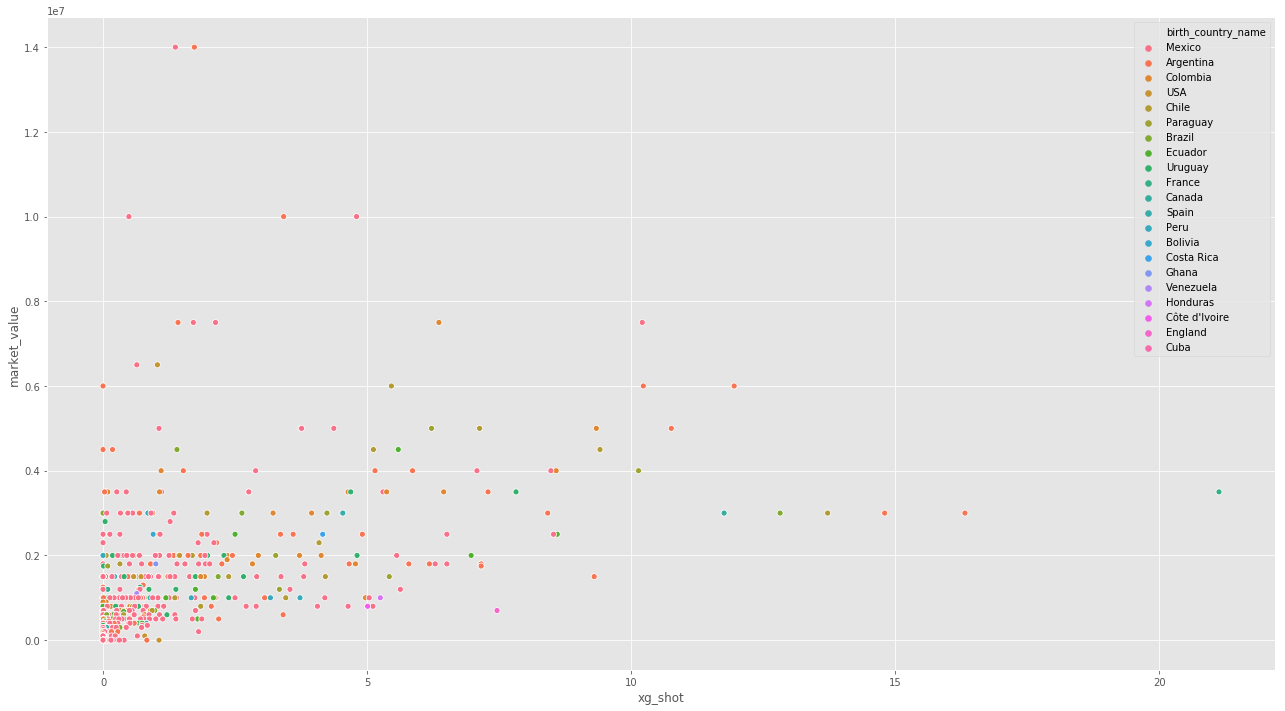

In [14]:
plt.rcParams['figure.figsize'] = (22,12)
sns.scatterplot(x="xg_shot", y="market_value", hue="birth_country_name", data=wyscout)

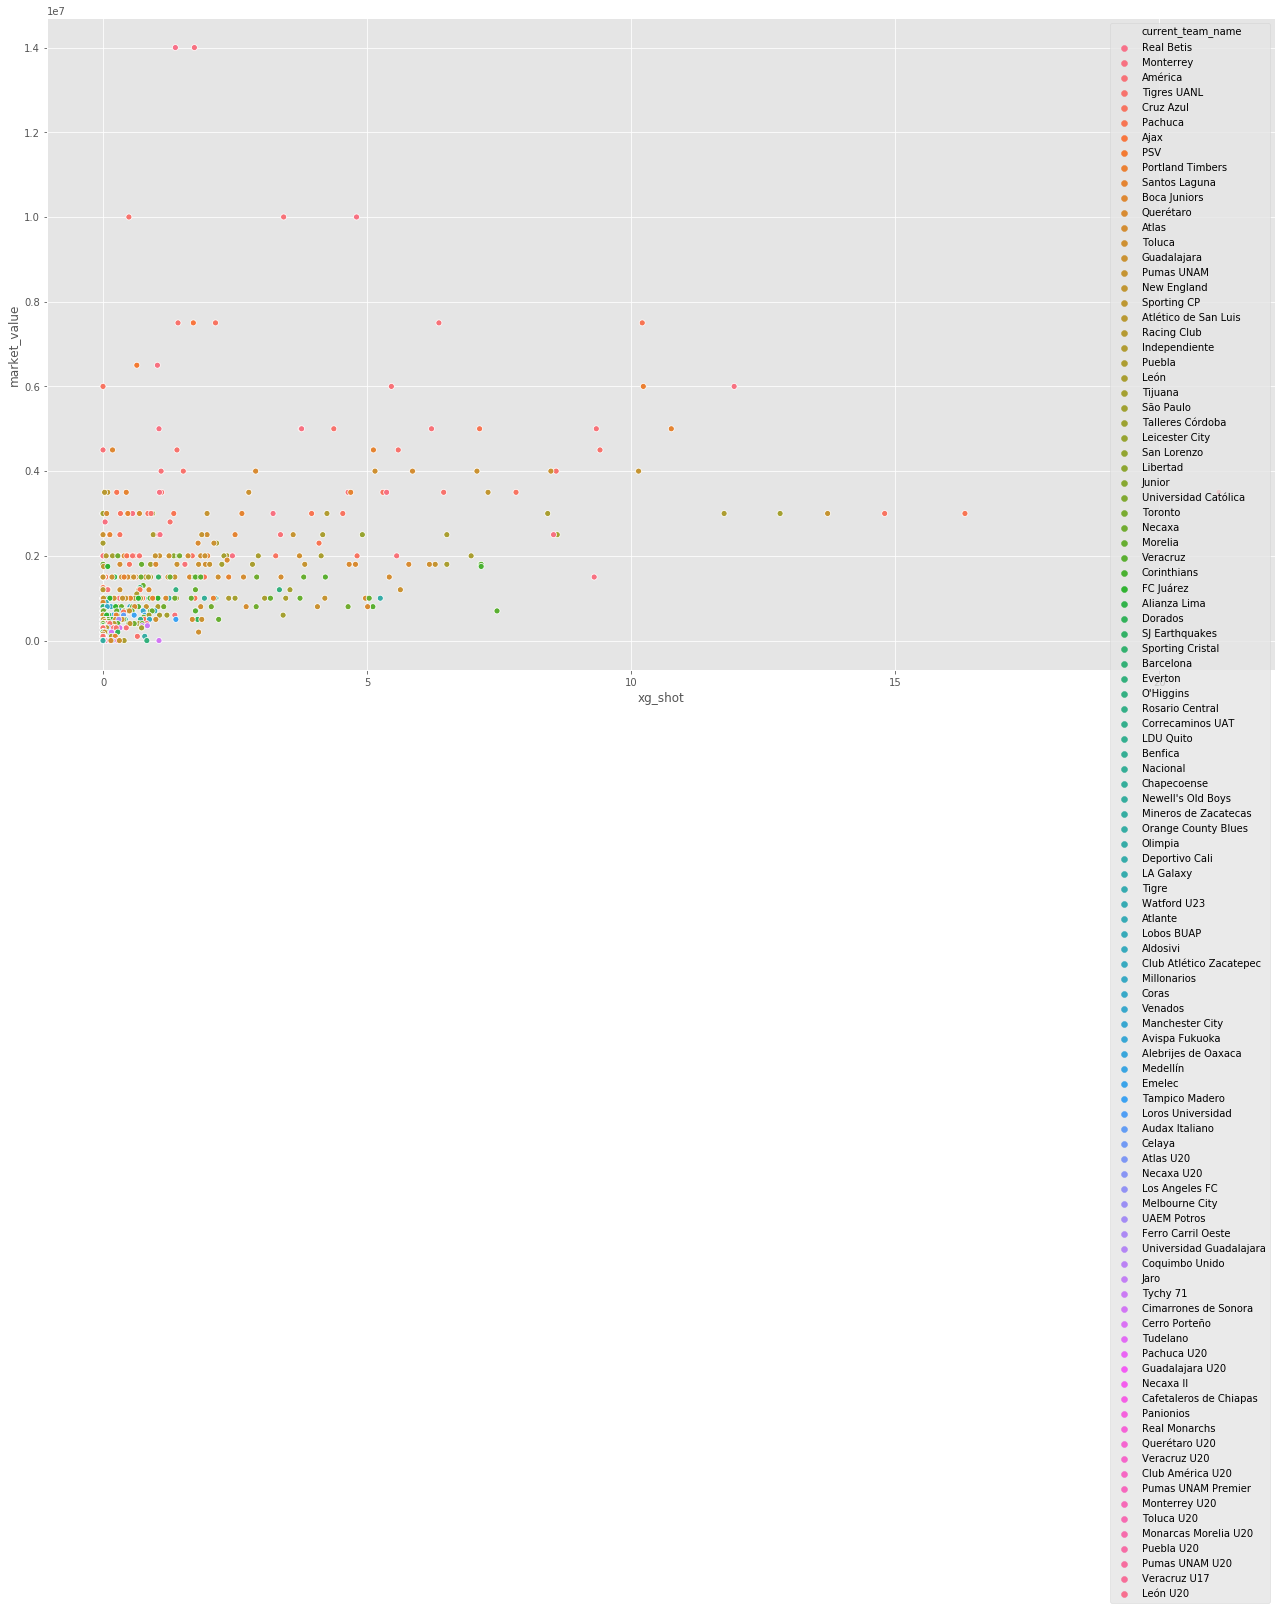

In [15]:
sns.scatterplot(x="xg_shot", y="market_value", hue="current_team_name", data=wyscout)

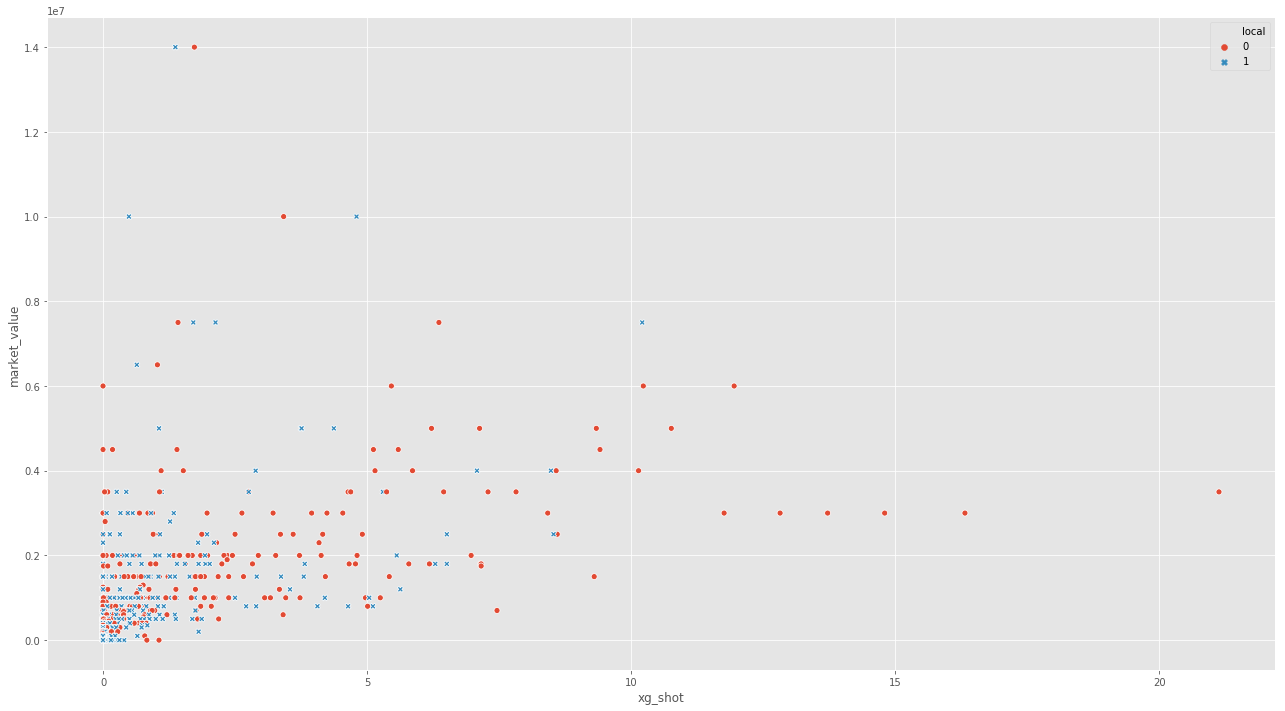

In [16]:
sns.scatterplot(x="xg_shot", y="market_value", hue="local", style='local', data=wyscout)

In [17]:
atacantes = wyscout[wyscout['position_raw'] == 3]
atacantes

,index,full_name,birth_country_name,birth_date,age,current_team_name,contract_expires,foot,height,weight,...,primary_position_percent,secondary_position,secondary_position_percent,third_position,third_position_percent,goals,xg_shot,minutes_on_field,position_raw,local
0,0,Diego Lainez Leyva,Mexico,2000-06-09,19,Real Betis,2024-06-30,left,167,58,...,35,RW,31,AMF,16,5,1.37,972,3,1
1,1,Maximiliano Eduardo Meza,Argentina,1992-12-15,26,Monterrey,2020-06-30,right,180,77,...,37,NaN,0,NaN,0,2,1.73,1362,3,0
3,3,Rodolfo Gilbert Pizarro Thomas,Mexico,1994-02-15,25,Monterrey,2023-06-30,right,173,64,...,50,LW,10,NaN,0,6,4.80,2549,3,1
5,5,Orbelín Pineda Alvarado,Mexico,1996-03-24,23,Cruz Azul,NaN,right,169,64,...,17,RCMF,16,RDMF,12,3,2.13,2394,3,1
12,12,Nicolás Ignacio Castillo Mora,Chile,1993-02-14,26,América,2023-06-30,right,179,74,...,100,NaN,0,NaN,0,7,5.46,1334,3,0
14,14,Brian Leonel Fernández,Argentina,1994-09-26,24,Portland Timbers,2022-06-30,right,172,74,...,35,RW,34,NaN,0,15,10.23,2294,3,0
15,15,Rogelio Gabriel Funes Mori,Argentina,1991-03-05,28,Monterrey,NaN,right,190,81,...,100,NaN,0,NaN,0,17,11.95,2409,3,0
17,17,Roberto Carlos Alvarado Hernández,Mexico,1998-09-07,20,Cruz Azul,NaN,left,176,70,...,23,LW,18,RCMF3,10,4,3.75,3531,3,1
18,18,Víctor Alejandro Dávila Zavala,Chile,1997-11-04,21,Pachuca,NaN,left,170,66,...,56,LWF,10,NaN,0,6,7.13,1719,3,0
20,20,Roger Beyker Martínez Tobinson,Colombia,1994-06-23,25,América,2023-06-30,right,180,76,...,72,AMF,17,NaN,0,10,9.34,2660,3,0


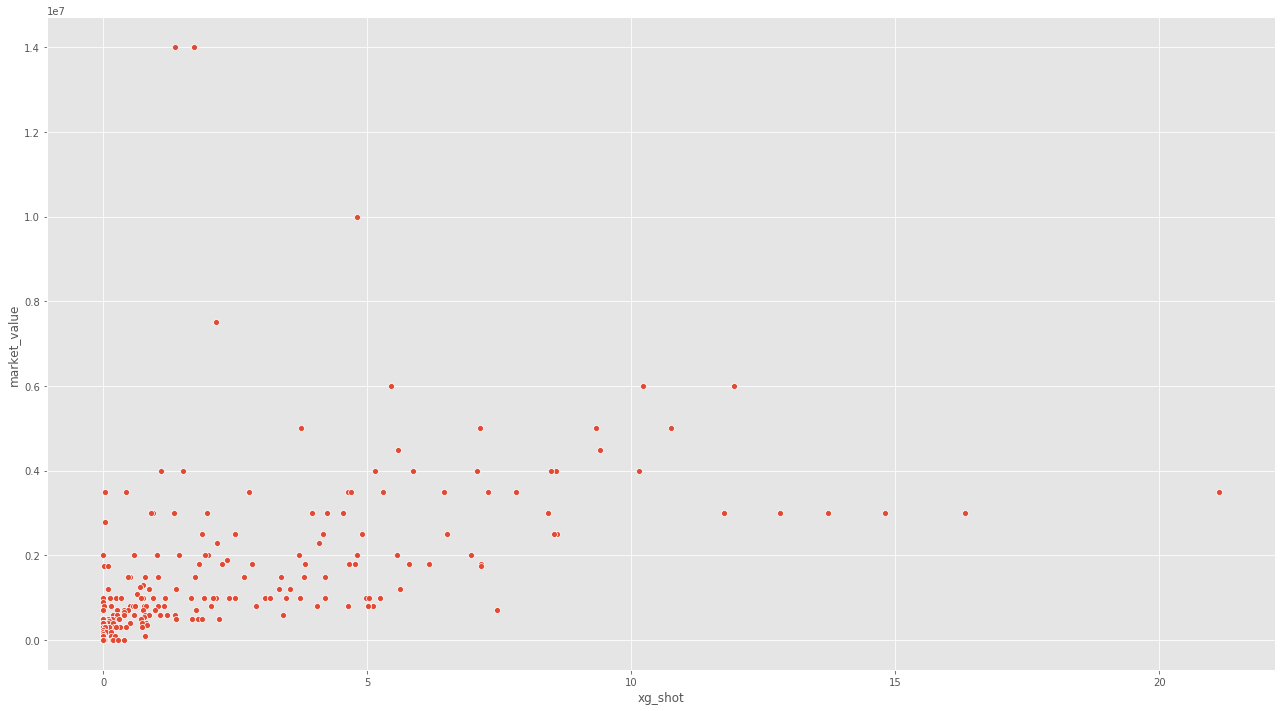

In [18]:
sns.scatterplot(x="xg_shot", y="market_value", data=atacantes)

#### Relación entre Goles y xG
Esperamos, con toda seguridad, una correlación positiva muy fuerte. Sería de particular interés anañizar a los outliers en esta gráfica, aquellos jugadores con muchos goles y poco xG serán jugadores particularmente eficientes, y viceversa.   

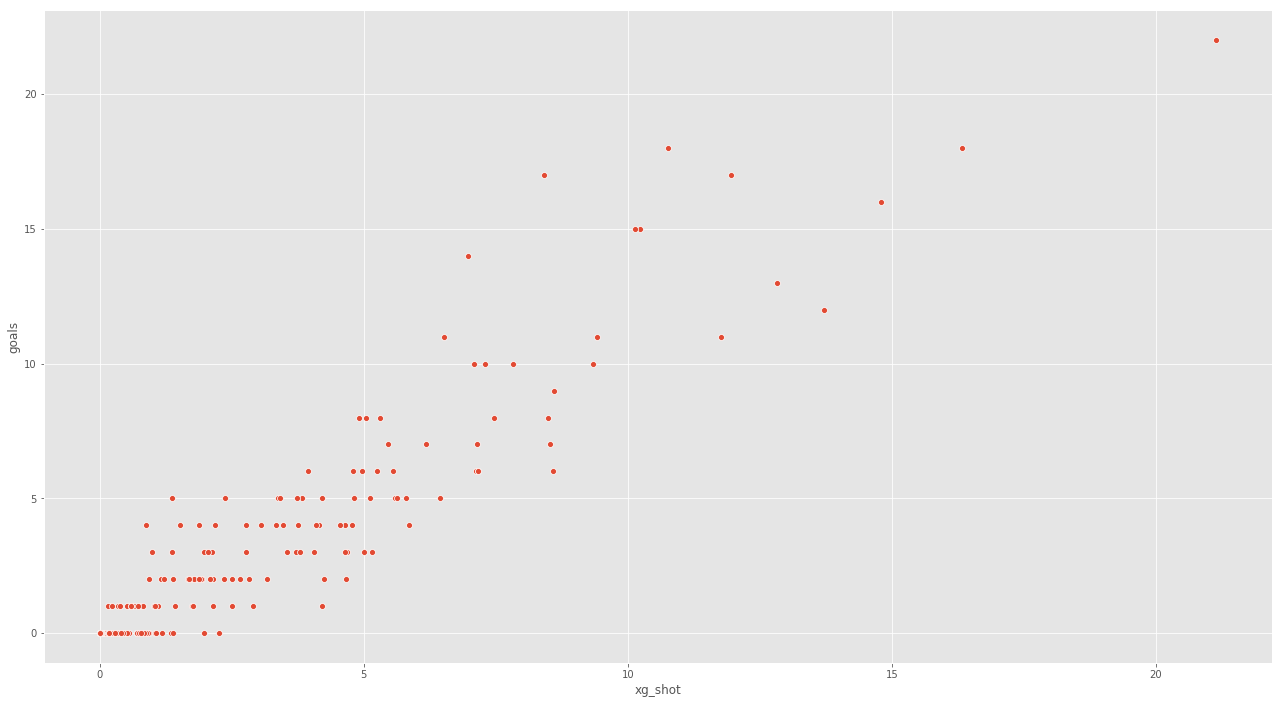

In [19]:
sns.scatterplot(x="xg_shot", y="goals", data=atacantes)

#### Boxplot de la Edad de los jugadores de la liga
Agrupar la información por equipos, que deberán ir en el eje de las abscisas y la edad en el eje de las ordenadas. 

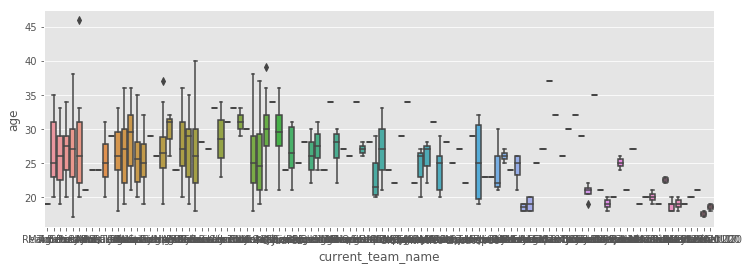

In [20]:
plt.figure(figsize=(12,4))
sns.boxplot(x='current_team_name', y = 'age', data=wyscout);

#### ¿Existe relación entre la edad de los jugadores de la LigaMx y los minutos en el campo? 
Agrupar la relación por posición de juego

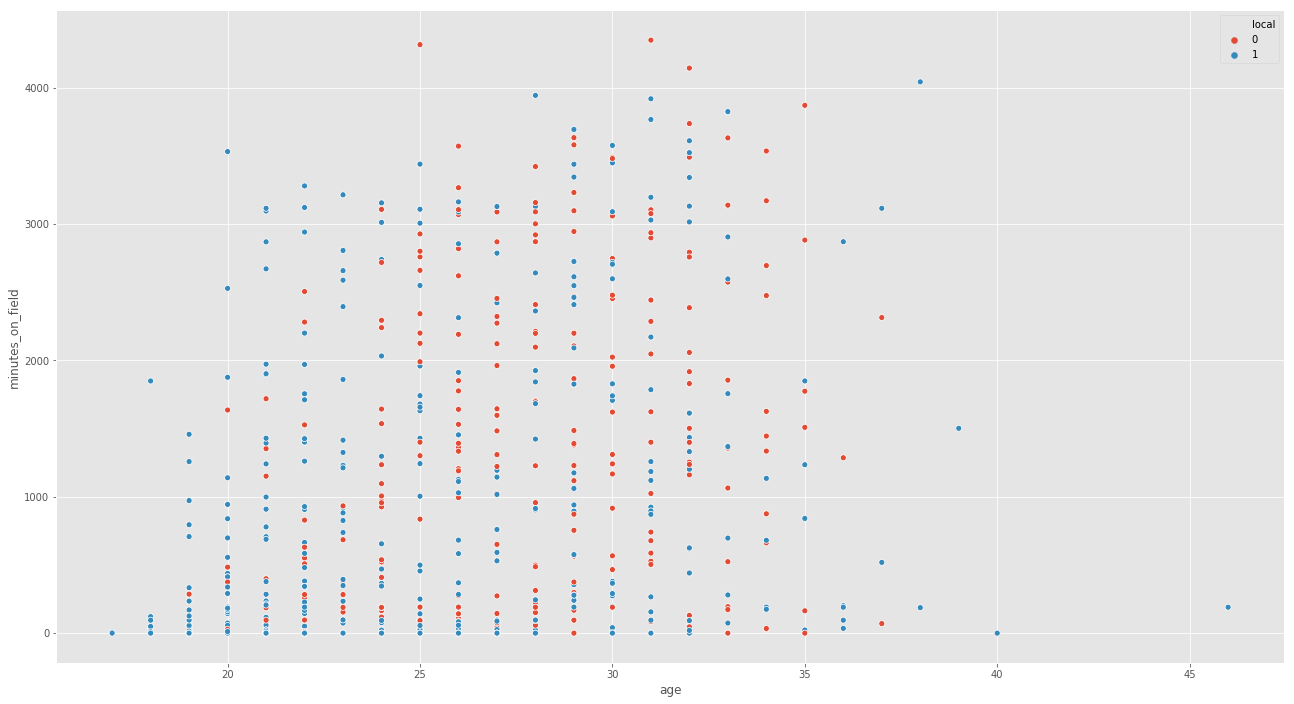

In [21]:
sns.scatterplot(x="age", y="minutes_on_field", hue="local", data=wyscout)

#### Entre los delanteros, ¿existe relación entre la altura y los goles anotados? 
Agrupar el dataframe por delanteros y graficar un scatter con la altura en el eje de las ordenadas y tanto los goles como los expected goals en el eje de las abscisas y obtener sus coeficientes de correlación. 

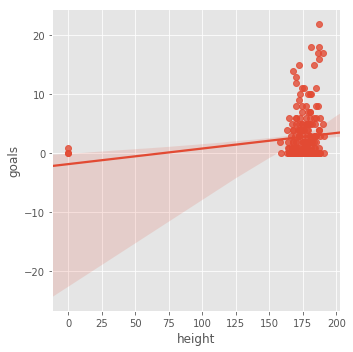

In [22]:
#atacantes.plot(x="height", y=["xg_shot", "goals"])
sns.lmplot("height", 'goals', data=atacantes, fit_reg=True);

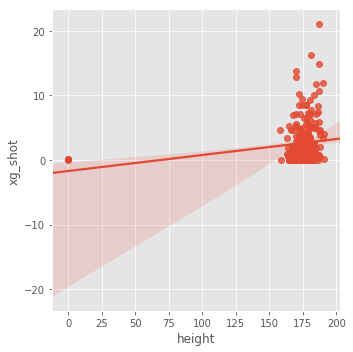

In [23]:
sns.lmplot("height", 'xg_shot', data=atacantes, fit_reg=True);

#### Atacantes, minutos en el campo y goles 
Graficar la relación entre los minutos en el campo de los delanteros y sus expected goals. En donde no esperaríamos ninguna relación significativa, dada la definición misma de expected goals. 
Posteriormente, graficar la relación entre minutos en el campo y goles. En esta segunda gráfica esperaríamos una relación positiva, además que sería particularmente interesante observar a los jugadores con relativamente muchos goles dada la cantidad de minutos jugados (es decir, los atacantes más eficientes).

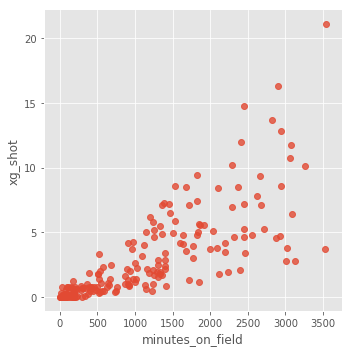

In [24]:
sns.lmplot('minutes_on_field', 'xg_shot', data=atacantes, fit_reg=False);

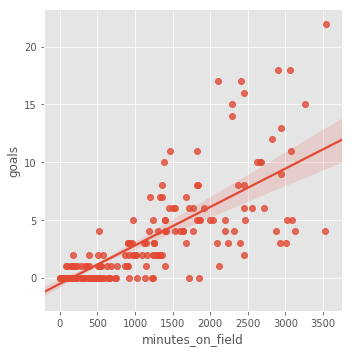

In [25]:
sns.lmplot('minutes_on_field', 'goals', data=atacantes, fit_reg=True);

#### Relación entre el peso y la altura de los jugadores. 
Graficar un scatter plot, agrupándolos por posición. 

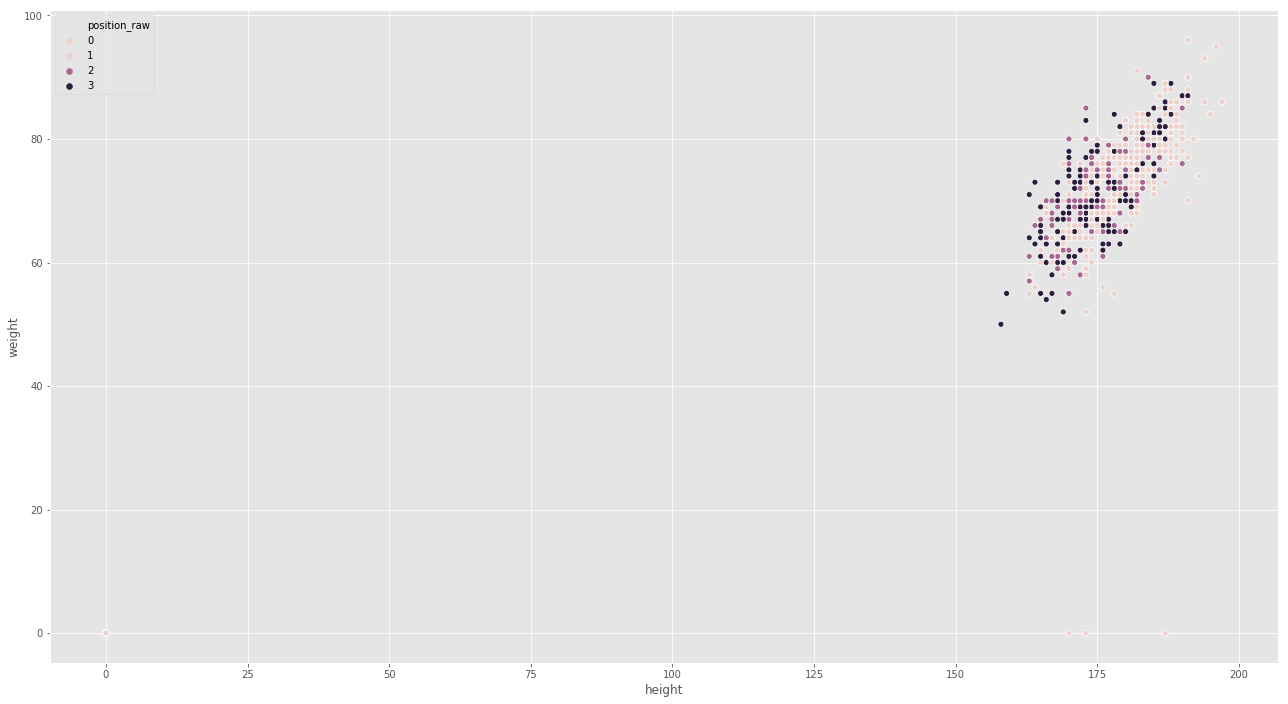

In [26]:
sns.scatterplot(x="height", y="weight", hue="position_raw", data=wyscout)

#### Matriz de correlaciones de las variables numéricas 
Seleccionar únicamente las variables numéricas de la base de datos y graficar un heatmap y un pairplot.

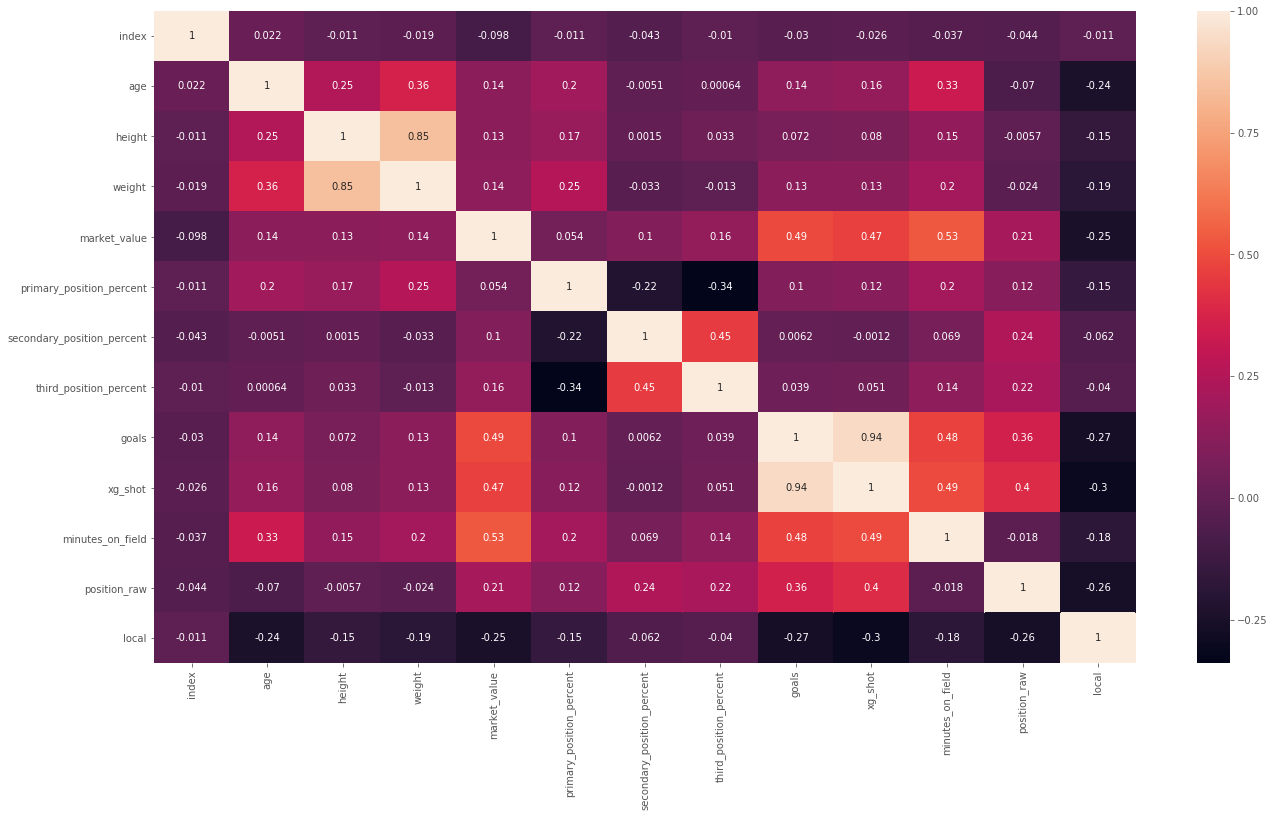

In [27]:
wyscout_numerical = wyscout.select_dtypes(include=['number'])
sns.heatmap(wyscout_numerical.corr(), xticklabels=wyscout_numerical.corr().columns, yticklabels=wyscout_numerical.corr().columns, annot=True);

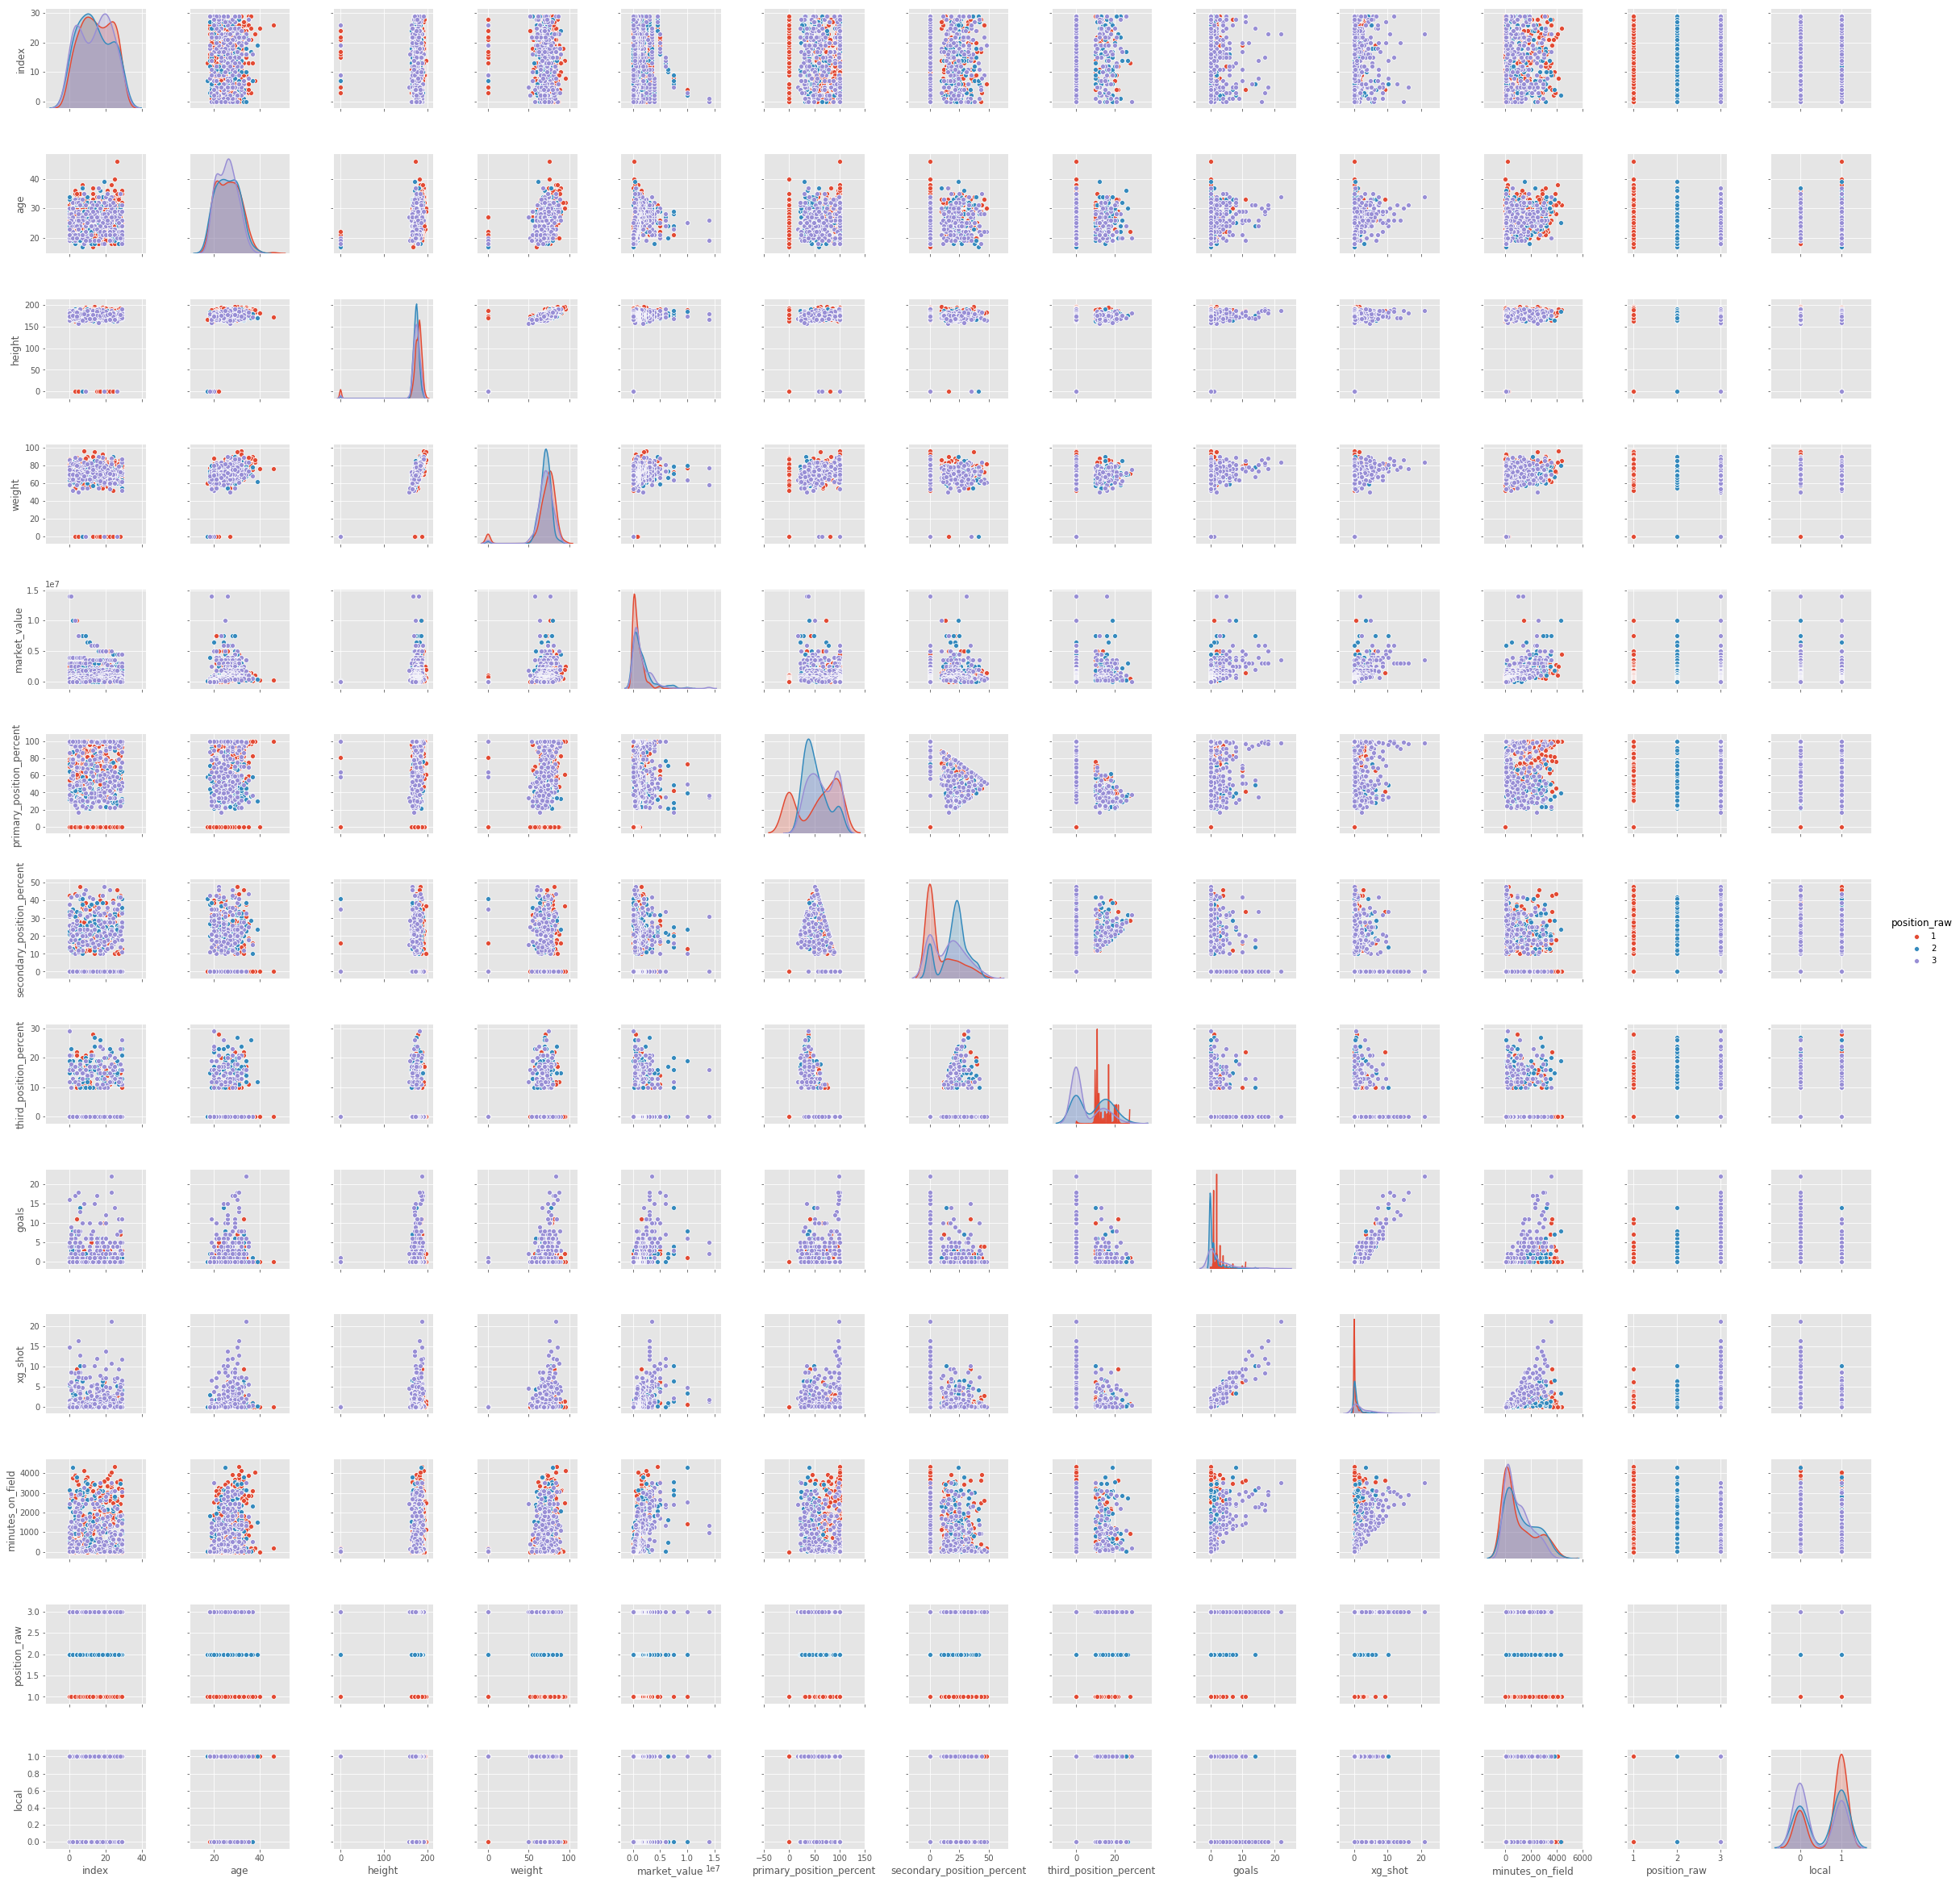

In [28]:
sns.pairplot(wyscout_numerical, hue='position_raw');

#### ¿Cuál es la relación entre el Valor de Mercado y la posición en el campo? 
¿Cuántas posiciones considera Wyscout? (.unique()). 
Graficar un boxplot con el valor de mercado en el eje y, agrupando por posiciones en el eje de las x. 
Posteriormente, hacer dos gráficos similares pero esta vez agrupando los datos por nacionalidad

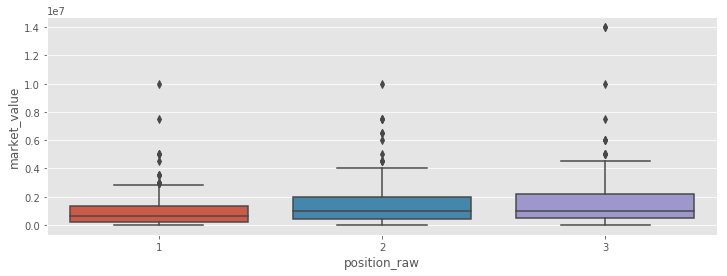

In [29]:
plt.figure(figsize=(12,4))
sns.boxplot(x='position_raw', y = 'market_value', data=wyscout);

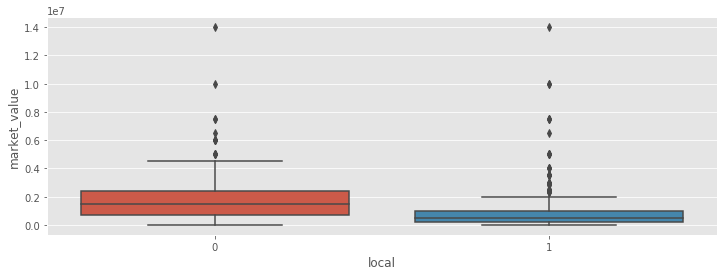

In [30]:
plt.figure(figsize=(12,4))
sns.boxplot(x='local', y = 'market_value', data=wyscout);

Ordenar de forma ascendente el valor de mercado de los jugadores de cada equipo. Posteriormente, hacer una gráfica lineal con los jugadores en el eje x y el valor de mercado en el eje y. ¿Cuáles son los equipos que se comportan de forma lineal, cóncava o convexa? 

In [ ]:
# Pendiente

####  ¿Cuál es la relación entre la edad de los jugadpres y la posición en el campo?
Graficar un boxplot con la edad en el eje y, agrupando por posiciones en el eje de las x. Posteriormente, hacer dos gráficos similares pero esta vez agrupando los datos por nacionalidad.

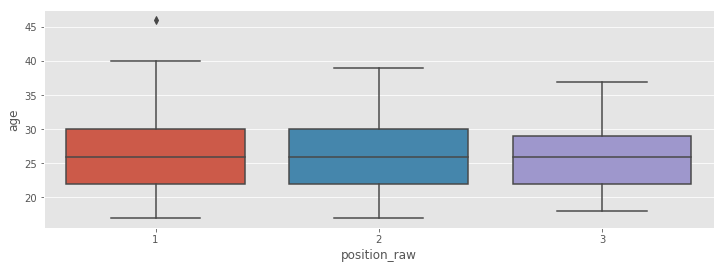

In [31]:
plt.figure(figsize=(12,4))
sns.boxplot(x='position_raw', y = 'age', data=wyscout);

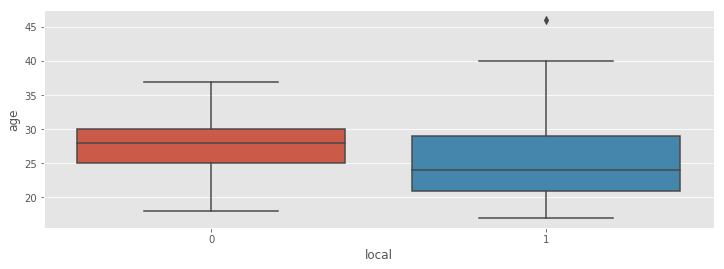

In [32]:
plt.figure(figsize=(12,4))
sns.boxplot(x='local', y = 'age', data=wyscout);

#### ¿Los jugadores zurdos son mejor valorados por el mercado? 
Los jugadores zurdos son un bien escaso, comprobar si el mercado los valora como tal. Graficar un boxplot con el valor de mercado en el eje y, agrupándo el eje x por el pie predilecto del jugador. 

Posteriormente, dibujar una gráfica similar pero con los Goles en el eje y. 

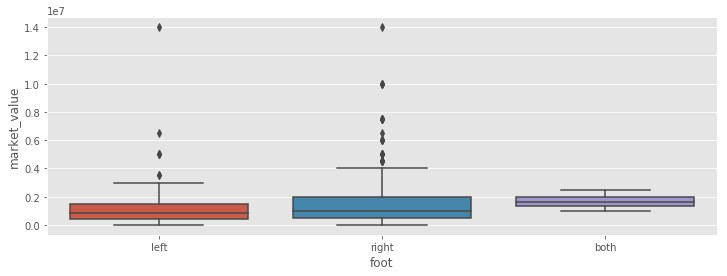

In [33]:
plt.figure(figsize=(12,4))
sns.boxplot(x='foot', y = 'market_value', data=wyscout);

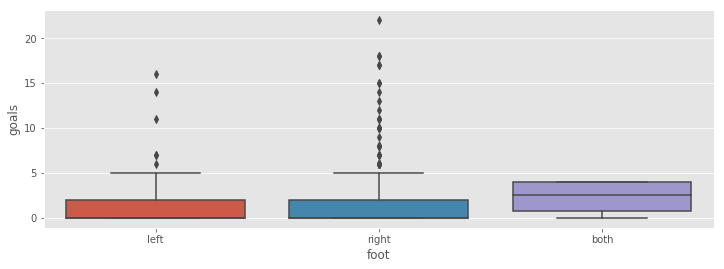

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(x='foot', y = 'goals', data=wyscout);

#### ¿El valor de mercado toma en cuenta la versatilidad? 
Crea una nueva columna en la base de datos que tome en cuenta la cantidad de posiciones en las que se puede desempeñar cada jugador, donde:

una = no es versátil. 
dos = versatilidad promedio. 
tres = versátil. 

Posteriormente, graficar un boxplot con el valor de mercado en el eje de las ordenadas y la versatilidad en el eje de las abscisas.   

In [35]:
len(wyscout.positions[0])

19

#### Una descripción más adecuada de versatilidad
Que un jugador se haya desempeñado en el último año en tres posiciones distintas no necesariamente implica que es versátil. Un mejor criterio para evaluar la versatilidad sería el porcentaje de tiempo en el que jugó en su tercera posición. 

En primer lugar, realizar una gráfica de violín sobre el porcentaje de minutos jugados en una tercera posición. Antes de graficarla, excluír aquellos valores que son iguales a cero. 

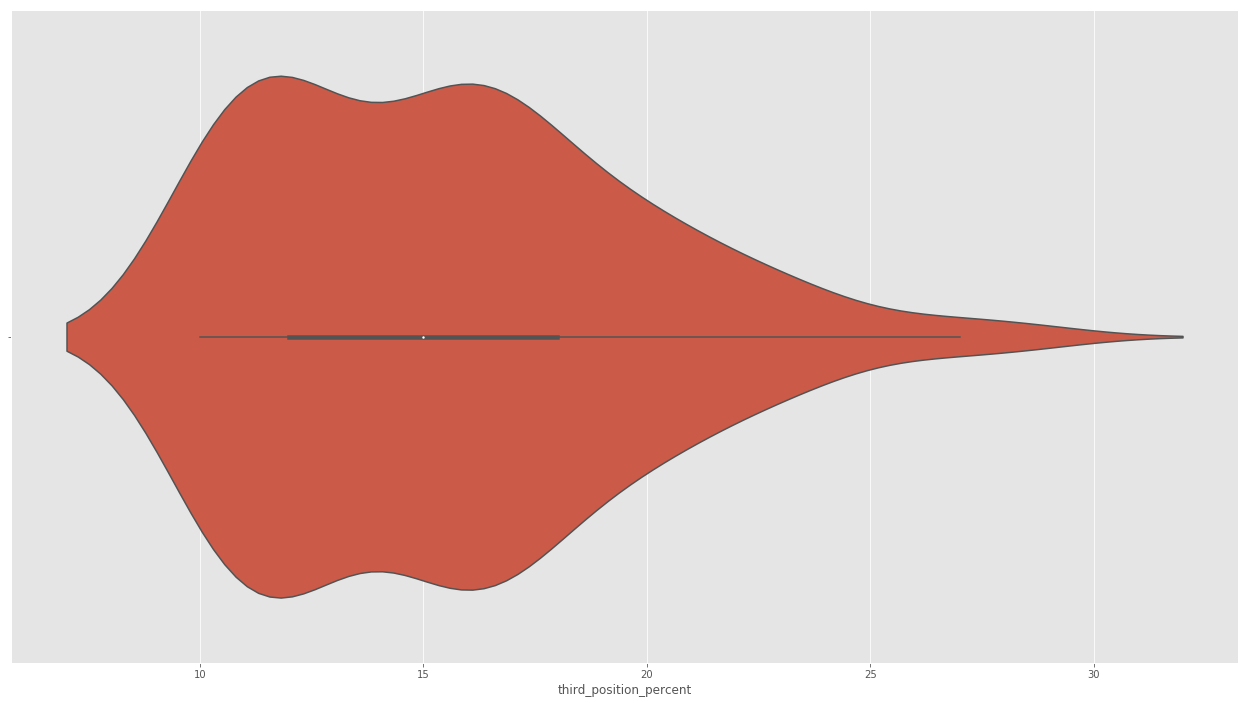

In [36]:
sns.violinplot('third_position_percent', data=wyscout[wyscout['third_position_percent'] != 0])

Una vez dibujada la gráfica de violín, analizar la media. Ahora, si un jugador tiene un porcentaje de minutos jugados en una tercera posición mayor a la media, podemos afirmar con más seguridad que es versátil. Con este nuevo criterio, podemos replicar la gráfica de mejor forma. 

In [37]:
def versatility(x):
    if x >= 15:
        return 3
    elif x > 0 and x < 15:
        return 2
    return 1
wyscout['versatility'] = wyscout['third_position_percent'].apply(versatility)
wyscout.head()

,index,full_name,birth_country_name,birth_date,age,current_team_name,contract_expires,foot,height,weight,...,secondary_position,secondary_position_percent,third_position,third_position_percent,goals,xg_shot,minutes_on_field,position_raw,local,versatility
0,0,Diego Lainez Leyva,Mexico,2000-06-09,19,Real Betis,2024-06-30,left,167,58,...,RW,31,AMF,16,5,1.37,972,3,1,3
1,1,Maximiliano Eduardo Meza,Argentina,1992-12-15,26,Monterrey,2020-06-30,right,180,77,...,NaN,0,NaN,0,2,1.73,1362,3,0,1
2,2,Guido Rodríguez,Argentina,1994-04-12,25,América,NaN,right,185,80,...,LDMF,24,DMF,19,8,3.42,4315,2,0,3
3,3,Rodolfo Gilbert Pizarro Thomas,Mexico,1994-02-15,25,Monterrey,2023-06-30,right,173,64,...,LW,10,NaN,0,6,4.80,2549,3,1,1
4,4,Carlos Joel Salcedo Hernández,Mexico,1993-09-29,25,Tigres UANL,2022-06-30,right,188,77,...,CB,13,NaN,0,1,0.49,1429,1,1,1


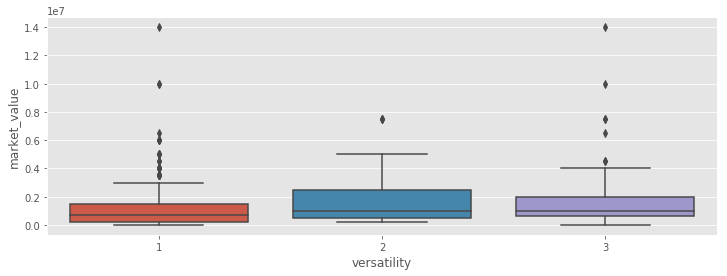

In [38]:
plt.figure(figsize=(12,4))
sns.boxplot(x='versatility', y = 'market_value', data=wyscout);

Hacer un loop para graficar los scatter plots que compartan eje x en una misma gráfica

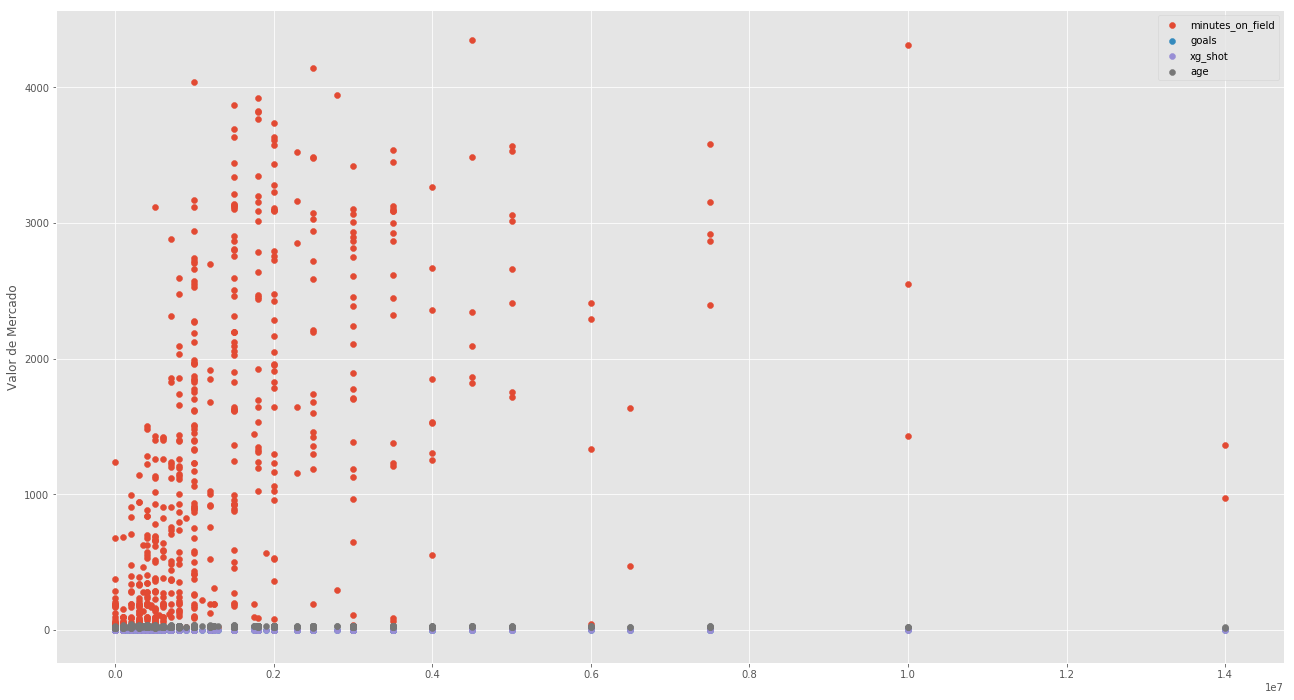

In [39]:
# y: market_value
# x: minutes_on_field, goals, xg_shot, age
plt.figure(figsize=(22,12))
for i in ['minutes_on_field', 'goals', 'xg_shot', 'age']:
    plt.scatter(wyscout['market_value'], wyscout[i])

plt.ylabel('Valor de Mercado')
plt.legend(['minutes_on_field', 'goals', 'xg_shot', 'age'])

# Transfermkt
Graficar un scatterplot con el valor de mercado de los 100 jugadores más caros de la liga, y agruparlo por edad, posición y equipo. 

In [80]:
transfermkt.columns

Index(['index', '#', 'Name', 'Posición', 'Nac.', 'Edad', 'Club',
       'Valor más alto de carrera', 'Última revisión', 'Valor de mercado',
       'Diferencial valor de Mercado'],
      dtype='object')

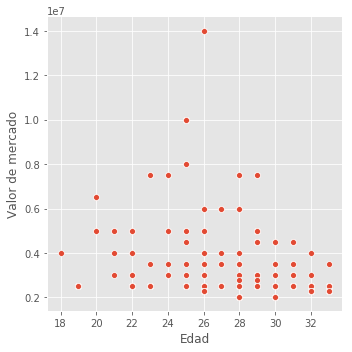

In [40]:
sns.relplot(x='Edad', y='Valor de mercado', data=transfermkt)

#### ¿Quénes son los jugadores que están en el mejor momento de su carrera? 
Podríamos asumir que aquellos jugadores cuyo cociente Valor de Mercado/ Valor más alto de su carrera es igual a uno están viviendo su "mejor momento". 

Hacer un nuevo dataframe con los jugadores que estén viviendo su mejor momento, tengan menos años que el mínimo entre la media y la mediana de edad y valgan menos de 6 millones de euros. 

Posteriormente, hacer una gráfica de barras que cuente el número de dichos jugadores de interés que tiene cada equipo.

In [101]:
# gi = grupo de interés 
gi1 = transfermkt[(transfermkt['Diferencial valor de Mercado'] == 1) & (transfermkt['Edad'] <= 26) & (transfermkt['Valor de mercado'] <= 6000000)]
gi1.groupby('Club')['Club'].count()

Club
Atlas Guadalajara         2
CD Cruz Azul             23
CF América                7
CF Monterrey             40
CF Pachuca                3
Club León FC             18
Club Tijuana             18
Deportivo Guadalajara    37
FC Juárez                18
Puebla FC                 1
Querétaro FC             19
Santos Laguna            22
Tigres UANL               1
UNAM Pumas                3
Name: Club, dtype: int64

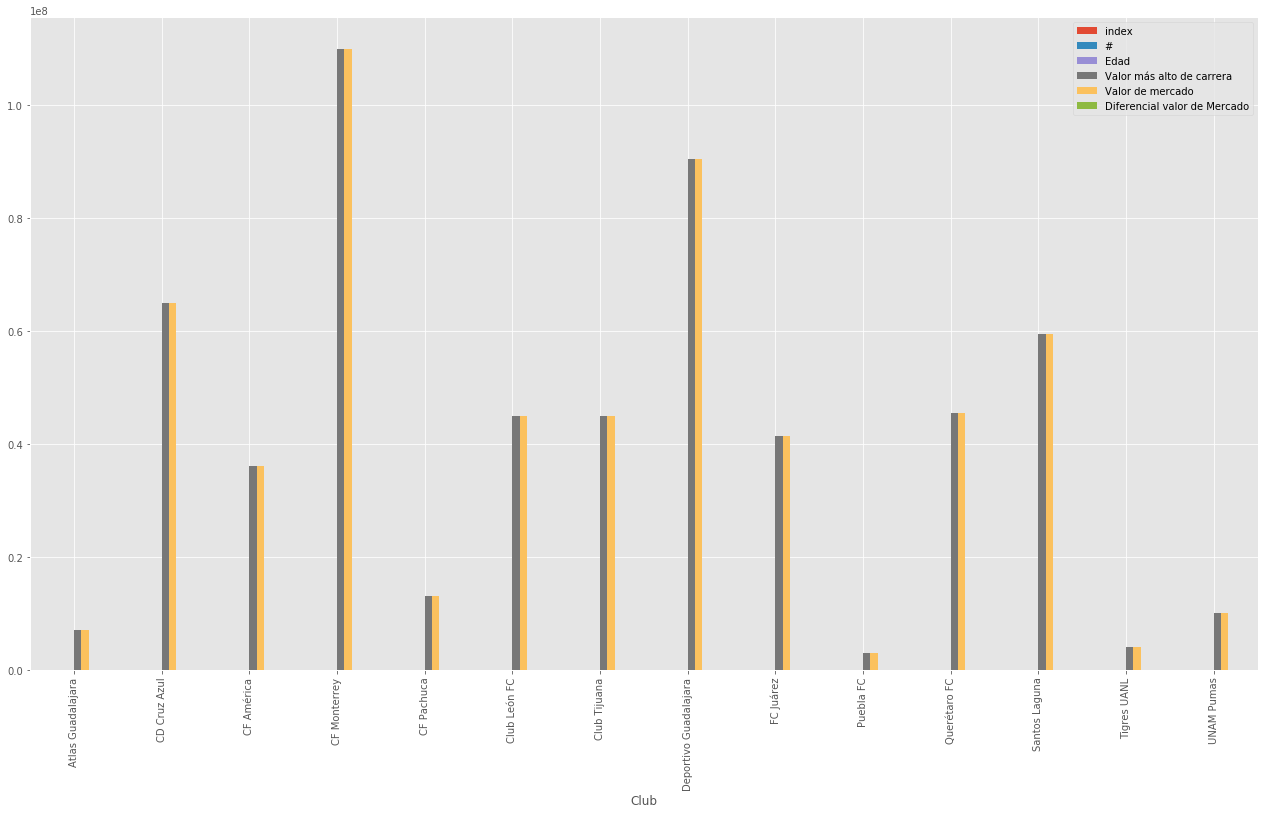

In [103]:
gi1.groupby('Club').sum().plot.bar()

#### Gráficas de Violín y Boxplot del diferencial de Valor de Mercado 

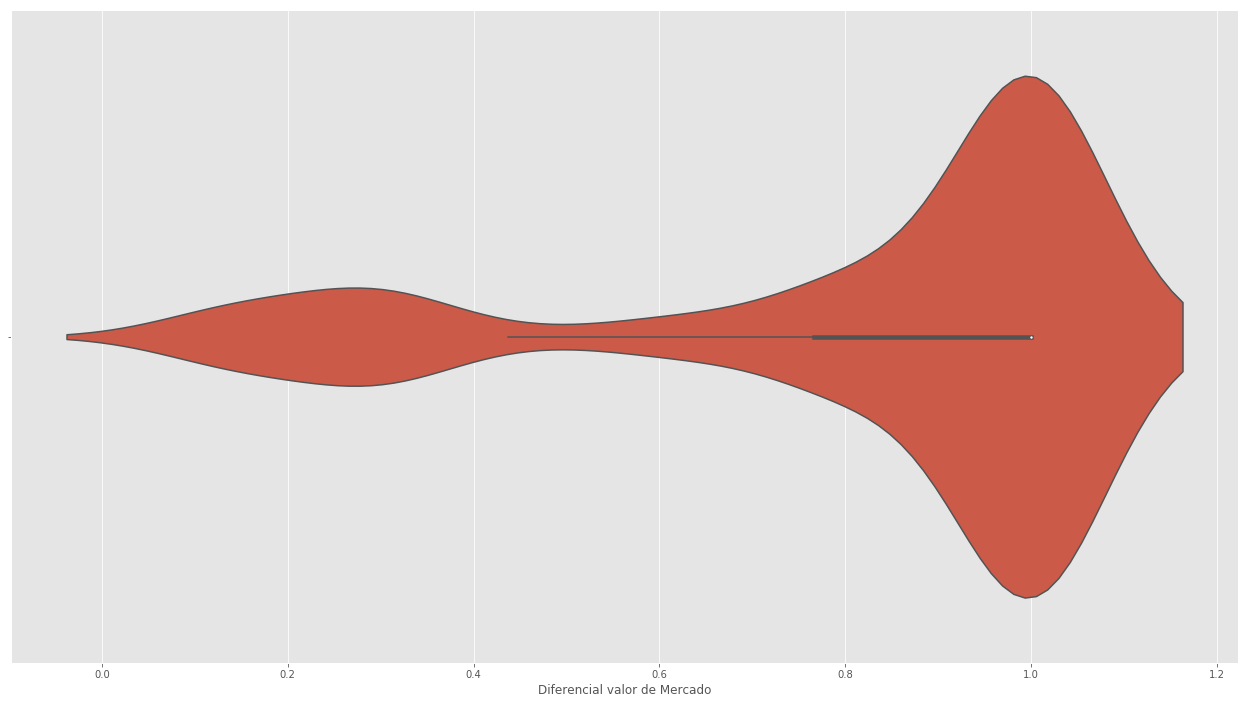

In [107]:
sns.violinplot("Diferencial valor de Mercado", data=transfermkt)

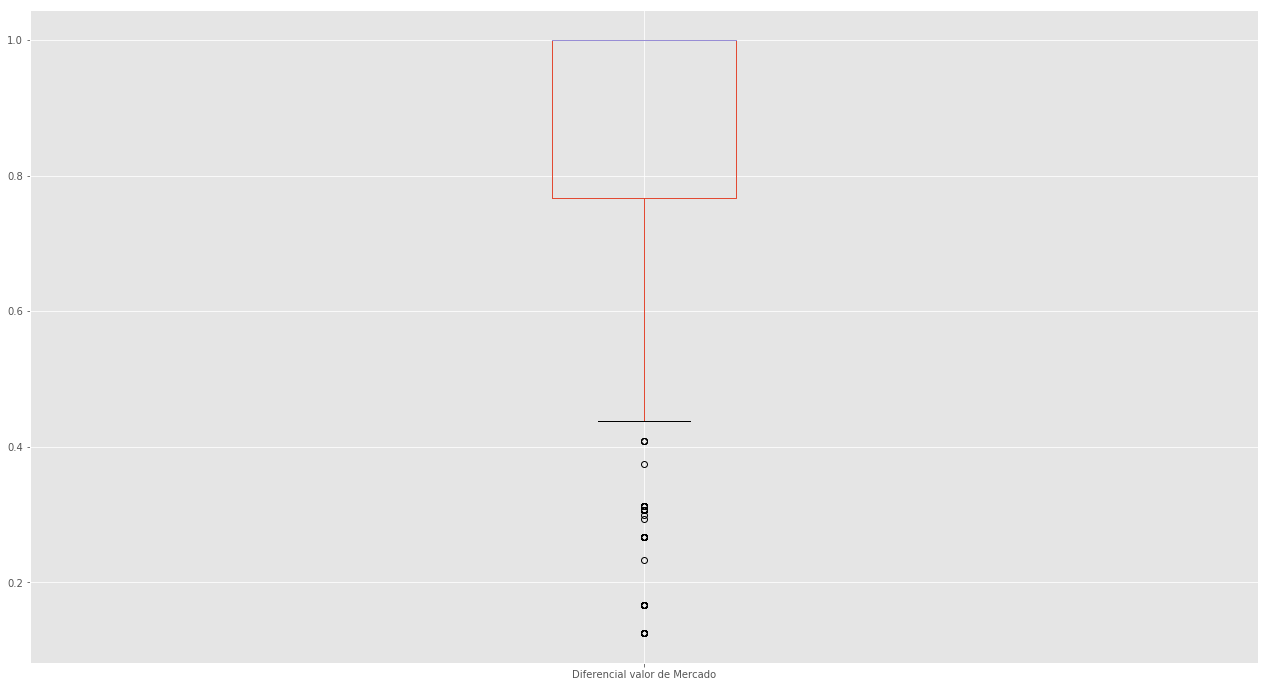

In [105]:
transfermkt.boxplot(column="Diferencial valor de Mercado")

#### Jugadores que no se encuentran en el mejor momento de su carrera
¿Cómo se distribuye la edad de dicho grupo? Hacer un histograma general y posteriormente graficar subplots que muestren la distribución de cada edad por posición. 

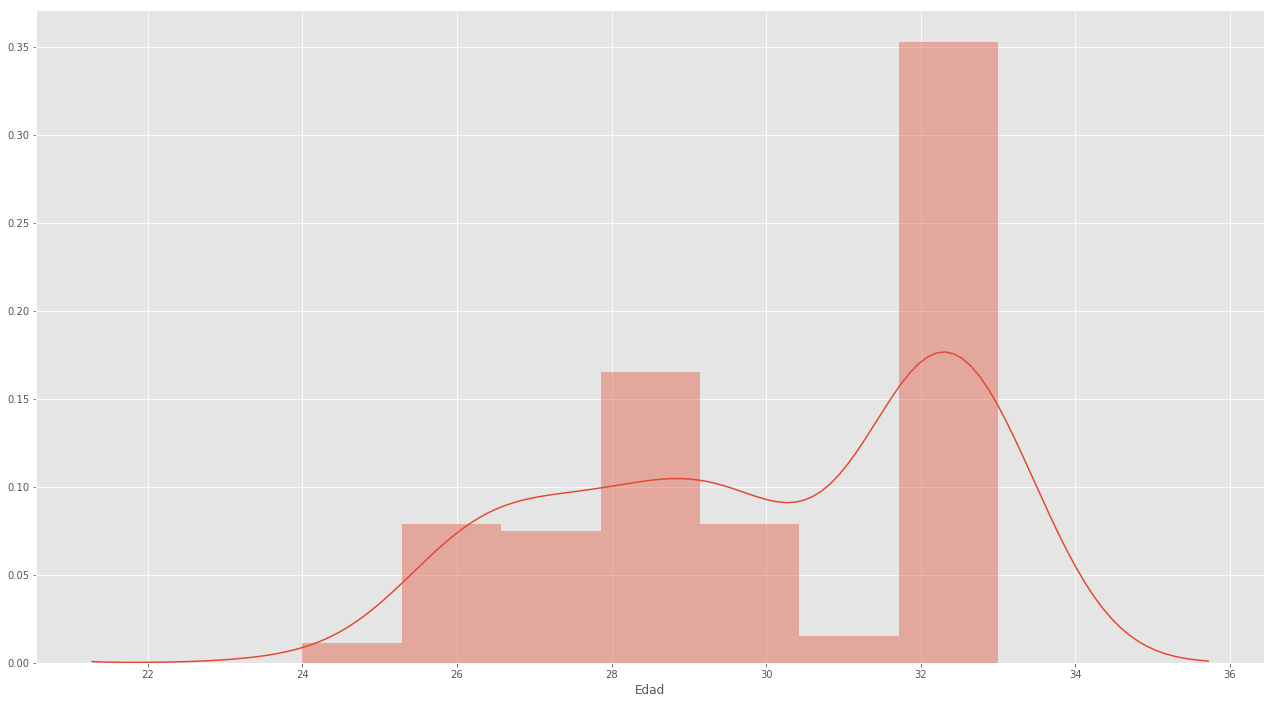

In [110]:
gi2 = transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1)]
sns.distplot(gi2['Edad']);

In [113]:
transfermkt.Posición.unique()

array(['Medio centro ofensivo', 'Defensa central', 'Pivote',
       'Delantero centro', 'Mediocentro', 'Mori Delantero centro',
       'Extremo izquierdo', 'Portero', 'Extremo derecho',
       'Lateral derecho', 'Lateral izquierdo', 'central',
       'Vázquez Pivote', 'Interior izquierdo', 'Rankin Lateral derecho',
       'Santos Mediapunta'], dtype=object)

In [114]:
def position_raw_transfermkt(x):
    if x == 'Delantero centro' or x == 'Medio centro ofensivo' or x=='Extremo derecho' or x=='Extremo izquierdo' or x=='Mediapunta':
        return 3
    elif x == 'Pivote' or x=='Mediocentro' or x=='Interior izquierdo' or x=='Interior derecho':
        return 2
    return 1
transfermkt['Posición Simple'] = transfermkt['Posición'].apply(position_raw_transfermkt)
transfermkt.head()

,index,#,Name,Posición,Nac.,Edad,Club,Valor más alto de carrera,Última revisión,Valor de mercado,Diferencial valor de Mercado,Posición Simple
0,0,1,Maximiliano Meza,Medio centro ofensivo,Argentina,26,CF Monterrey,14000000.0,08/02/2019,14000000.0,1.000000,3
1,1,2,Rodolfo Pizarro,Medio centro ofensivo,México,25,CF Monterrey,10000000.0,08/02/2019,10000000.0,1.000000,3
2,2,3,Carlos Salcedo,Defensa central,México,25,Tigres UANL,10000000.0,08/02/2019,10000000.0,1.000000,1
3,3,4,Guido Rodríguez,Pivote,Argentina,25,CF América,10000000.0,08/02/2019,10000000.0,1.000000,2
4,4,5,Vincent Janssen,Delantero centro,Países Bajos,25,CF Monterrey,14000000.0,13/06/2019,8000000.0,0.571429,3


In [115]:
gi2_defensas = transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1) & (transfermkt['Posición Simple'] == 1)]
gi2_mediocampistas = transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1) & (transfermkt['Posición Simple'] == 2)]
gi2_atacantes = transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1) & (transfermkt['Posición Simple'] == 3)]

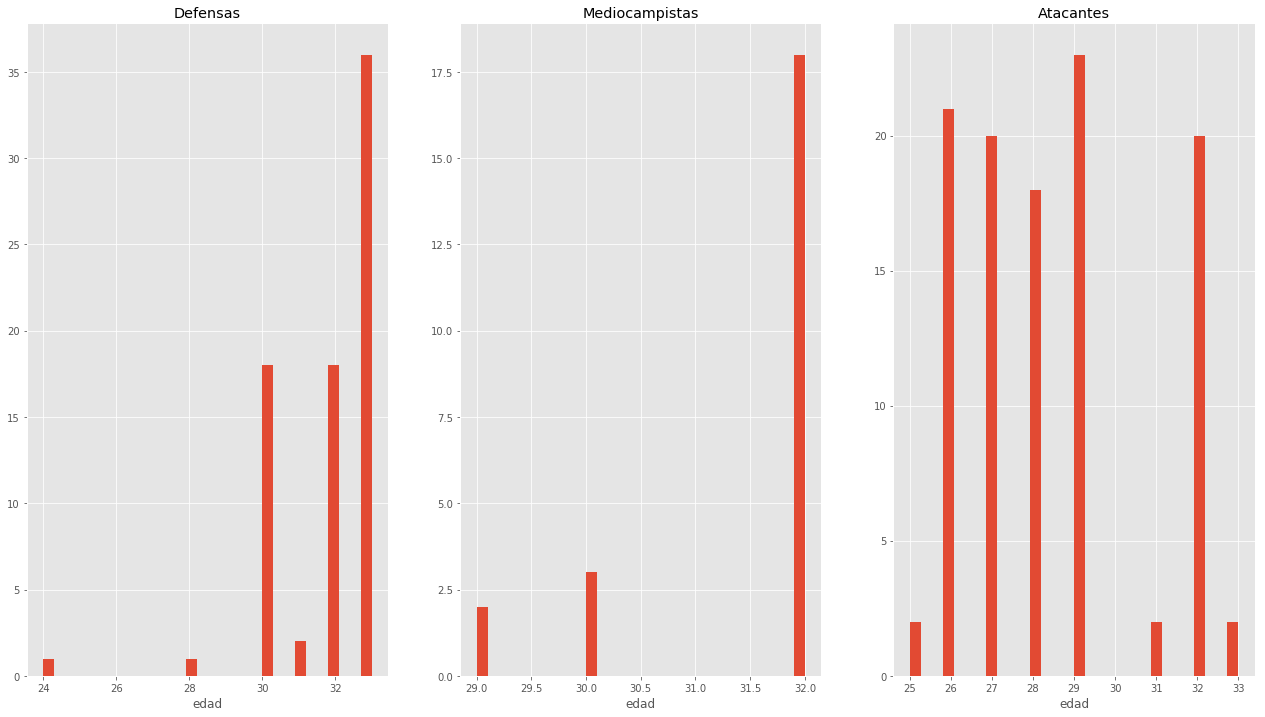

In [125]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
ax1.hist(gi2_defensas['Edad'], bins=30)
ax1.set_title('Defensas')   
ax1.set_xlabel('edad')      

ax2.hist(gi2_mediocampistas['Edad'], bins=30)
ax2.set_title('Mediocampistas')
ax2.set_xlabel('edad')

ax3.hist(gi2_atacantes['Edad'], bins=30)
ax3.set_title('Atacantes')
ax3.set_xlabel('edad')

plt.show()

Hacer un gráfico de dispersión entre los jugadores que no se encuentren en su mejor momento y su edad. Donde serán particularmente interesantes aquellos jugadores "jóvenes" que no se encuentren en su mejor momento. 

Si un jugador se encuentra en el percentil 25 de los jugadores que no están en el mejor momento de su carrera y además son muy jóvenes, sería muy interesante conocer el por qué. Hacer un gráfico de barras que muestre cuántos de estos jugadores particularmente interesantes tiene cada Club.

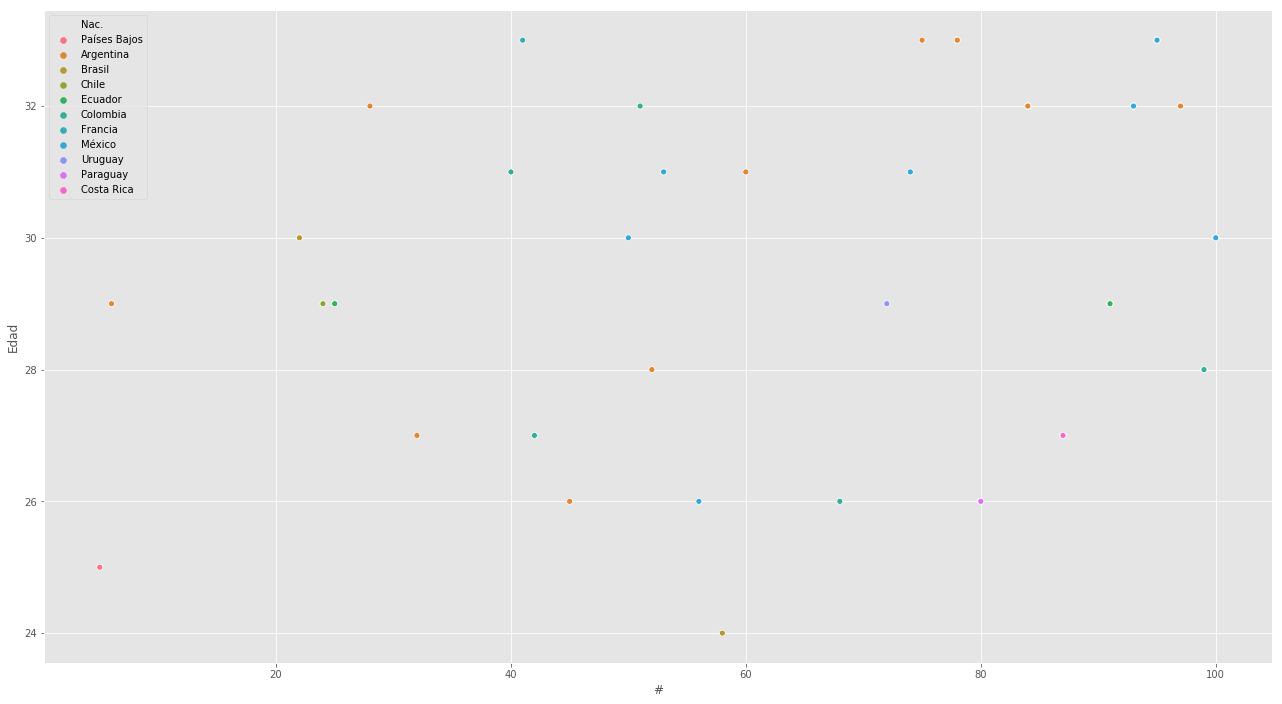

In [119]:
sns.scatterplot(x="#", y="Edad", hue="Nac.", data=gi2)

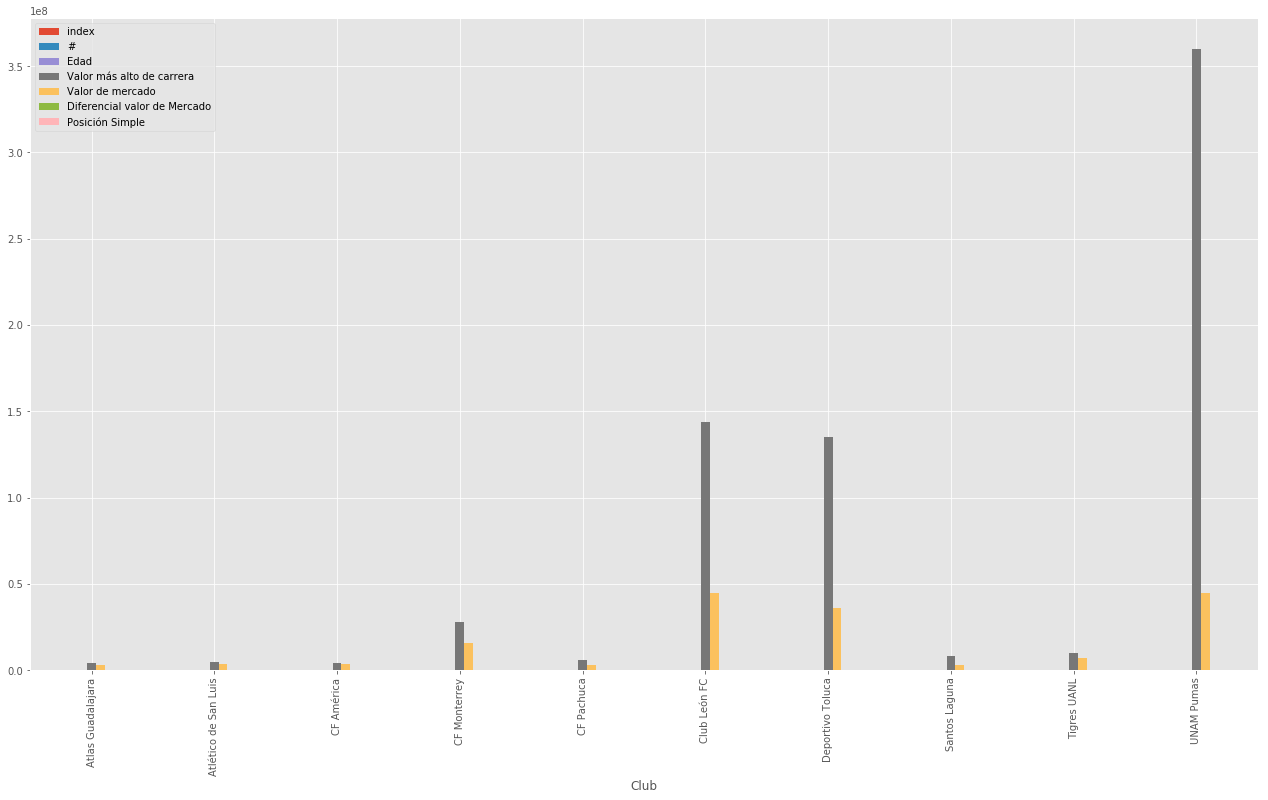

In [123]:
# Jugadores jóvenes, que en algún momento valieron más de 4MDE y actualmente no están en su "mejor momento"
gi3 = transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1) & (transfermkt['Edad'] <= 28) & (transfermkt['Valor más alto de carrera'] >= 4000000)]
gi3.groupby('Club').sum().plot.bar()

In [128]:
len(transfermkt[(transfermkt['Diferencial valor de Mercado'] == 1)].Name)

343

In [129]:
len(transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1)].Name)

207

Dibuja una gráfica de pastel que muestre el porcentaje de jugadores del top 100 de la liga que se encuentran en su mejor momento. 

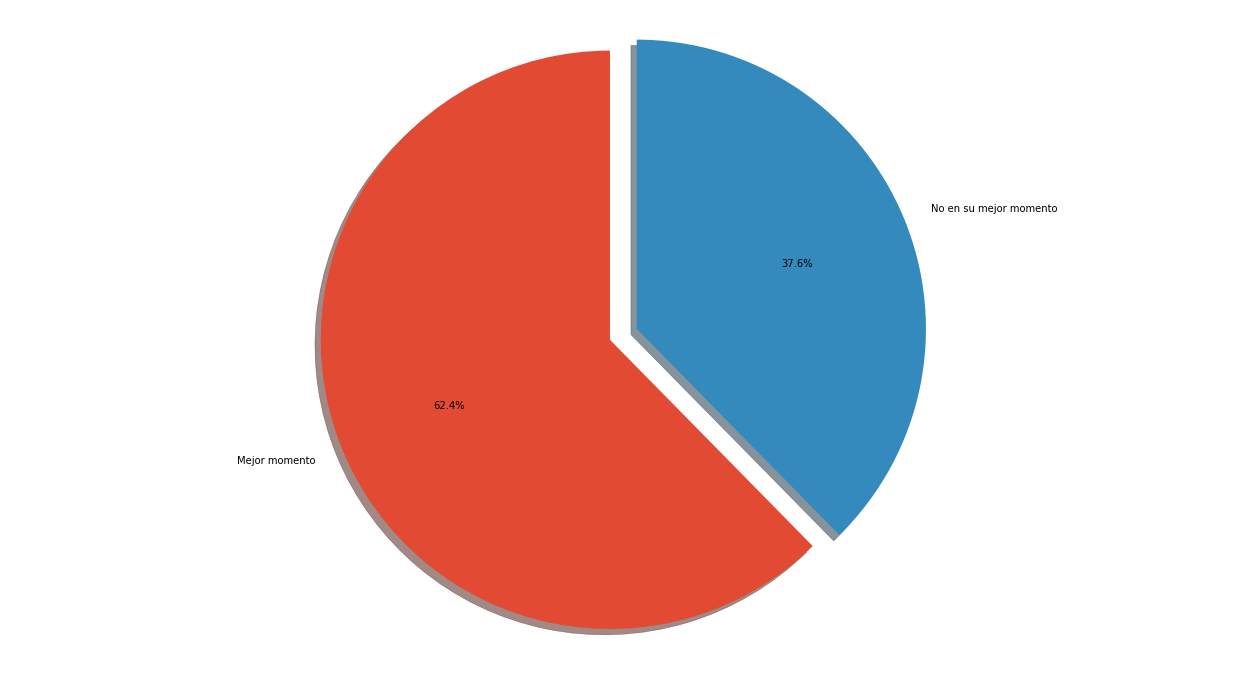

In [130]:
labels = ['Mejor momento', 'No en su mejor momento']
sizes = [len(transfermkt[(transfermkt['Diferencial valor de Mercado'] == 1)].Name), len(transfermkt[(transfermkt['Diferencial valor de Mercado'] != 1)].Name)]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

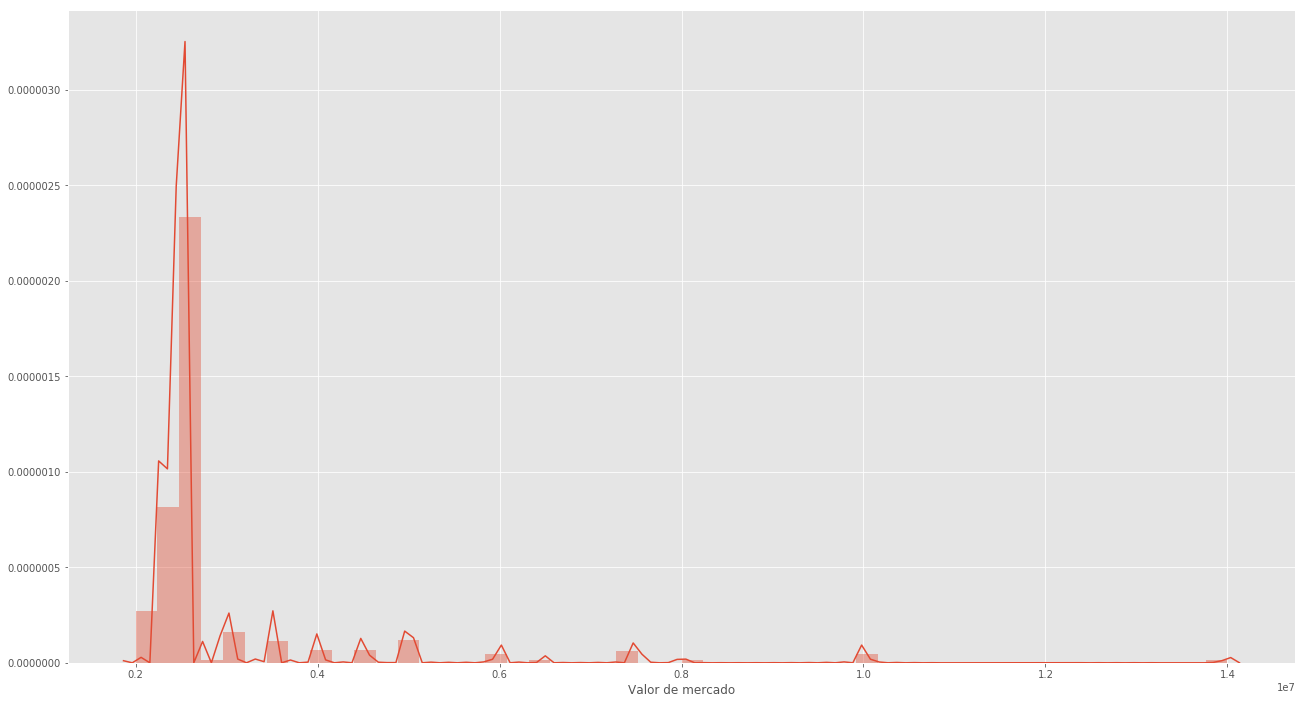

In [132]:
sns.distplot(transfermkt['Valor de mercado']);

In [150]:
transfermkt['Valor de mercado'].quantile(.90)

4000000.0

Crea una nueva columna que refleje una categoría para el valor de mercado de los jugadores: 'accesible', 'medio' y 'caro'. Posteriormente, grafica en subplots tres gráficas de pastel (una para cada categoría de precio) que muestren la distribución de la nacionalidad. 

In [155]:
def price(x):
    if x >= transfermkt['Valor de mercado'].quantile(.90):
        return 3
    elif x > transfermkt['Valor de mercado'].quantile(.30) and x < transfermkt['Valor de mercado'].quantile(.90):
        return 2
    return 1
transfermkt['Precio'] = transfermkt['Valor de mercado'].apply(price)
transfermkt.tail()

,index,#,Name,Posición,Nac.,Edad,Club,Valor más alto de carrera,Última revisión,Valor de mercado,Diferencial valor de Mercado,Posición Simple,Precio
545,20,96,Jaime Gómez,Pivote,México,26,Querétaro FC,2300000.0,08/02/2019,2300000.0,1.000000,2,1
546,21,97,Ismael Sosa,Extremo derecho,Argentina,32,Club León FC,7500000.0,08/02/2019,2300000.0,0.306667,3,1
547,22,98,José van Rankin,Rankin Lateral derecho,México,26,Deportivo Guadalajara,2300000.0,08/02/2019,2300000.0,1.000000,1,1
548,23,99,Felipe Pardo,Extremo derecho,Colombia,28,Deportivo Toluca,7500000.0,08/02/2019,2000000.0,0.266667,3,1
549,24,100,Giovani dos Santos,Santos Mediapunta,México,30,CF América,12000000.0,15/12/2018,2000000.0,0.166667,1,1


In [176]:
def local_transfer(x):
    if x == 'México':
        return 1
    return 0
transfermkt['local'] = transfermkt['Nac.'].apply(local_transfer)
transfermkt.head(6)

,index,#,Name,Posición,Nac.,Edad,Club,Valor más alto de carrera,Última revisión,Valor de mercado,Diferencial valor de Mercado,Posición Simple,Precio,local
0,0,1,Maximiliano Meza,Medio centro ofensivo,Argentina,26,CF Monterrey,14000000.0,08/02/2019,14000000.0,1.000000,3,3,0
1,1,2,Rodolfo Pizarro,Medio centro ofensivo,México,25,CF Monterrey,10000000.0,08/02/2019,10000000.0,1.000000,3,3,1
2,2,3,Carlos Salcedo,Defensa central,México,25,Tigres UANL,10000000.0,08/02/2019,10000000.0,1.000000,1,3,1
3,3,4,Guido Rodríguez,Pivote,Argentina,25,CF América,10000000.0,08/02/2019,10000000.0,1.000000,2,3,0
4,4,5,Vincent Janssen,Delantero centro,Países Bajos,25,CF Monterrey,14000000.0,13/06/2019,8000000.0,0.571429,3,3,0
5,5,6,Guido Pizarro,Pivote,Argentina,29,Tigres UANL,15000000.0,08/02/2019,7500000.0,0.500000,2,3,0


In [158]:
transfer_accesible = transfermkt[(transfermkt['Precio'] == 1)]
transfer_promedio = transfermkt[(transfermkt['Precio'] == 2)]
transfer_caros = transfermkt[(transfermkt['Precio'] == 3)]

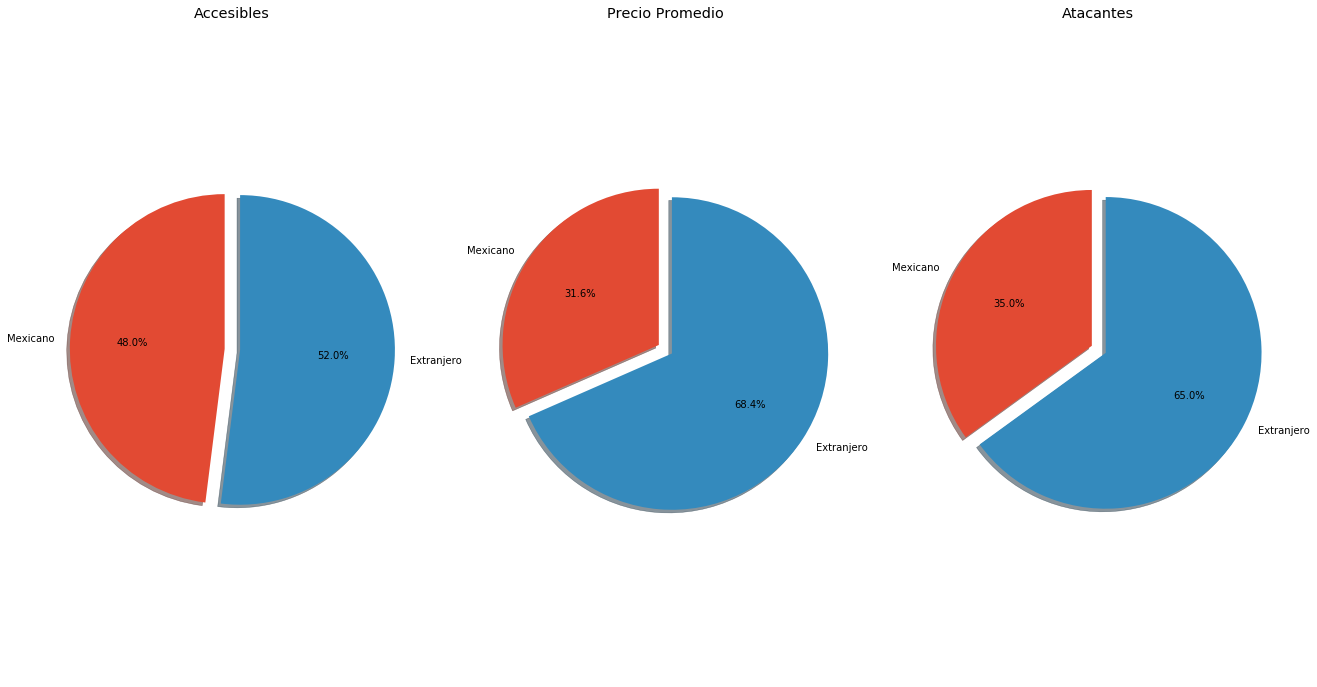

In [160]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
ax1.pie([len(transfer_accesible[(transfer_accesible['local'] == 1)].Name), len(transfer_accesible[(transfer_accesible['local'] != 1)].Name)], explode=(0, 0.1), labels=['Mexicano', 'Extranjero'], autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Accesibles')       

ax2.pie([len(transfer_promedio[(transfer_promedio['local'] == 1)].Name), len(transfer_promedio[(transfer_promedio['local'] != 1)].Name)], explode=(0, 0.1), labels=['Mexicano', 'Extranjero'], autopct='%1.1f%%', shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Precio Promedio')

ax3.pie([len(transfer_caros[(transfer_caros['local'] == 1)].Name), len(transfer_caros[(transfer_caros['local'] != 1)].Name)], explode=(0, 0.1), labels=['Mexicano', 'Extranjero'], autopct='%1.1f%%', shadow=True, startangle=90)
ax3.axis('equal')
ax3.set_title('Atacantes')

plt.show()

#### CatPlot
Grafica un catplot con el valor de mercado en el eje de las x, y las posiciones por categoría en el eje de las y, y agrupa la gráfica por nacionalidad (únicamente con dos categorías, mexicano o extranjero).

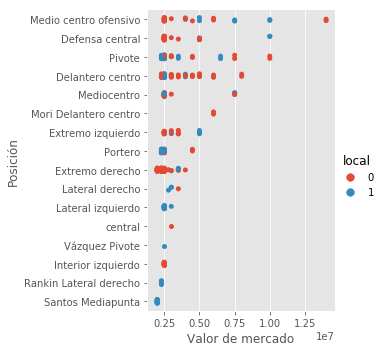

In [161]:
sns.catplot(x="Valor de mercado", y="Posición", hue="local", data=transfermkt);

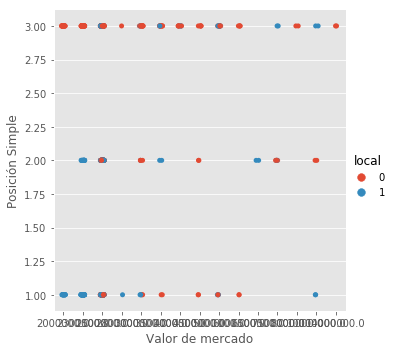

In [162]:
sns.catplot(x="Valor de mercado", y="Posición Simple", hue="local", data=transfermkt);

#### Pivot Tables 

Hacer una pivot table que tome el como valor la media del valor de mercado, que los índices sean los clubes y las columnas las posiciones. 

Posteriormente hacer una pivot table similar pero ahora con la nacionalidad como índice. 

In [163]:
pd.pivot_table(transfermkt, index=['Club'], columns=['Posición'], values=['Valor de mercado'], aggfunc='mean')

Valor de mercado                                   \
Posición               Defensa central Delantero centro Extremo derecho   
Club                                                                      
Atlas Guadalajara            3000000.0     4.000000e+06             NaN   
Atlético de San Luis               NaN              NaN             NaN   
CD Cruz Azul                 3500000.0     3.250000e+06       3250000.0   
CF América                   2750000.0     5.500000e+06       3500000.0   
CF Monterrey                 5000000.0     3.050000e+06       3150000.0   
CF Pachuca                   2500000.0     3.875000e+06             NaN   
Club León FC                       NaN     2.526316e+06       2400000.0   
Club Tijuana                       NaN     3.000000e+06             NaN   
Deportivo Guadalajara              NaN     4.000000e+06       3500000.0   
Deportivo Toluca                   NaN     4.000000e+06       2000000.0   
FC Juárez                          NaN     2.300000e+06             NaN   
Puebla FC                          NaN     3.000000e+06             NaN   
Querétaro FC                       NaN              NaN             NaN   
Santos Laguna                      NaN     5.000000e+06       3500000.0   
Tigres UANL                 10000000.0     4.300000e+06       3500000.0   
UNAM Pumas                         NaN     3.500000e+06       2500000.0   

                                                                            \
Posición              Extremo izquierdo Interior izquierdo Lateral derecho   
Club                                                                         
Atlas Guadalajara                   NaN                NaN             NaN   
Atlético de San Luis       3.500000e+06                NaN             NaN   
CD Cruz Azul                        NaN                NaN             NaN   
CF América                 3.500000e+06                NaN             NaN   
CF Monterrey               4.333333e+06                NaN       3250000.0   
CF Pachuca                 3.000000e+06                NaN             NaN   
Club León FC                        NaN                NaN             NaN   
Club Tijuana                        NaN                NaN             NaN   
Deportivo Guadalajara               NaN                NaN             NaN   
Deportivo Toluca                    NaN                NaN             NaN   
FC Juárez                           NaN                NaN             NaN   
Puebla FC                           NaN                NaN             NaN   
Querétaro FC                        NaN                NaN             NaN   
Santos Laguna              2.552632e+06                NaN       3000000.0   
Tigres UANL                4.500000e+06                NaN       2800000.0   
UNAM Pumas                 3.000000e+06          2500000.0             NaN   

                                                                           \
Posición              Lateral izquierdo Medio centro ofensivo Mediocentro   
Club                                                                        
Atlas Guadalajara             3000000.0                   NaN         NaN   
Atlético de San Luis          2500000.0                   NaN         NaN   
CD Cruz Azul                        NaN             5500000.0   6000000.0   
CF América                          NaN             4000000.0   7500000.0   
CF Monterrey                        NaN            12000000.0   2500000.0   
CF Pachuca                          NaN             6000000.0         NaN   
Club León FC                        NaN                   NaN         NaN   
Club Tijuana                        NaN             2500000.0         NaN   
Deportivo Guadalajara               NaN                   NaN         NaN   
Deportivo Toluca                    NaN                   NaN         NaN   
FC Juárez                           NaN                   NaN         NaN   
Puebla FC                          

In [164]:
pd.pivot_table(transfermkt, index=['Nac.'], columns=['Posición'], values=['Valor de mercado'], aggfunc='mean')

Valor de mercado                                   \
Posición      Defensa central Delantero centro Extremo derecho   
Nac.                                                             
Argentina        2.526316e+06     3.687500e+06       2300000.0   
Bolivia                   NaN              NaN             NaN   
Brasil                    NaN     3.000000e+06             NaN   
Canadá                    NaN     3.000000e+06             NaN   
Chile                     NaN     3.016000e+06             NaN   
Colombia         2.500000e+06     5.000000e+06       2175000.0   
Costa Rica                NaN              NaN       2500000.0   
Ecuador                   NaN     4.500000e+06       3500000.0   
España                    NaN              NaN       3000000.0   
Francia                   NaN     3.500000e+06             NaN   
México           7.500000e+06     2.578947e+06       3375000.0   
Paraguay         4.500000e+06     4.000000e+06       2500000.0   
Países Bajos              NaN     8.000000e+06             NaN   
Perú                      NaN              NaN             NaN   
Uruguay                   NaN     3.500000e+06       2800000.0   

                                                                   \
Posición     Extremo izquierdo Interior izquierdo Lateral derecho   
Nac.                                                                
Argentina         3.500000e+06          2500000.0             NaN   
Bolivia                    NaN                NaN             NaN   
Brasil                     NaN                NaN             NaN   
Canadá                     NaN                NaN             NaN   
Chile             3.000000e+06                NaN             NaN   
Colombia          3.333333e+06                NaN    3.500000e+06   
Costa Rica                 NaN                NaN             NaN   
Ecuador           2.500000e+06                NaN             NaN   
España                     NaN                NaN             NaN   
Francia                    NaN                NaN             NaN   
México            4.600000e+06                NaN    2.933333e+06   
Paraguay                   NaN                NaN             NaN   
Países Bajos               NaN                NaN             NaN   
Perú                       NaN                NaN             NaN   
Uruguay           3.500000e+06                NaN             NaN   

                                                                  \
Posición     Lateral izquierdo Medio centro ofensivo Mediocentro   
Nac.                                                               
Argentina                  NaN             8800000.0         NaN   
Bolivia                    NaN                   NaN   2500000.0   
Brasil                     NaN                   NaN         NaN   
Canadá                     NaN                   NaN         NaN   
Chile                      NaN             4500000.0         NaN   
Colombia                   NaN             3500000.0   7500000.0   
Costa Rica                 NaN                   NaN         NaN   
Ecuador                    NaN             2500000.0         NaN   
España                     NaN                   NaN         NaN   
Francia                    NaN                   NaN         NaN   
México            2.526316e+06             7000000.0   3000000.0   
Paraguay                   NaN                   NaN         NaN   
Países Bajos               NaN                   NaN         NaN   
Perú                       NaN                   NaN   3000000.0   
Uruguay                    NaN                   NaN         NaN   

                                                                \
Posición     Mori Delantero centro        Pivote       Portero   
Nac.                                                             
Argentina                6000000.0  3.636364e+06  2.700000e+06   
Bolivia                        NaN           NaN           NaN   
Brasil                    

#### Distribución del valor de mercado
Graficar en 3 subplots un histograma de la distribución del valor de mercado con distintos valores para los bins.  

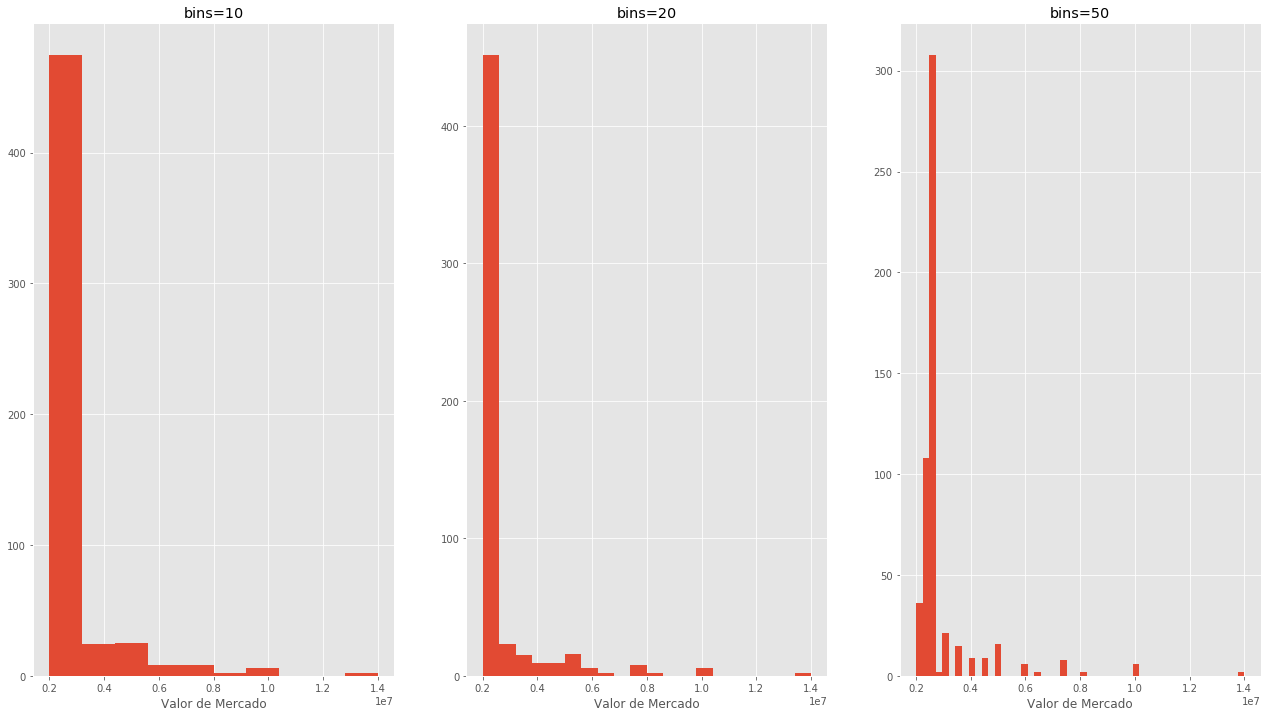

In [165]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3)
ax1.hist(transfermkt['Valor de mercado'])
ax1.set_title('bins=10')   
ax1.set_xlabel('Valor de Mercado')     

ax2.hist(transfermkt['Valor de mercado'], bins=20)
ax2.set_title('bins=20')
ax2.set_xlabel('Valor de Mercado')

ax3.hist(transfermkt['Valor de mercado'], bins=50)
ax3.set_title('bins=50')
ax3.set_xlabel('Valor de Mercado')

plt.show()

#### Comparativa entre plantillas 
Hacer un gráfico de barras conjunto que compare la media del valor de la plantilla de Chivas y América por posición. El valor de mercado en el eje y, y en el eje x se agrupa por posición. 

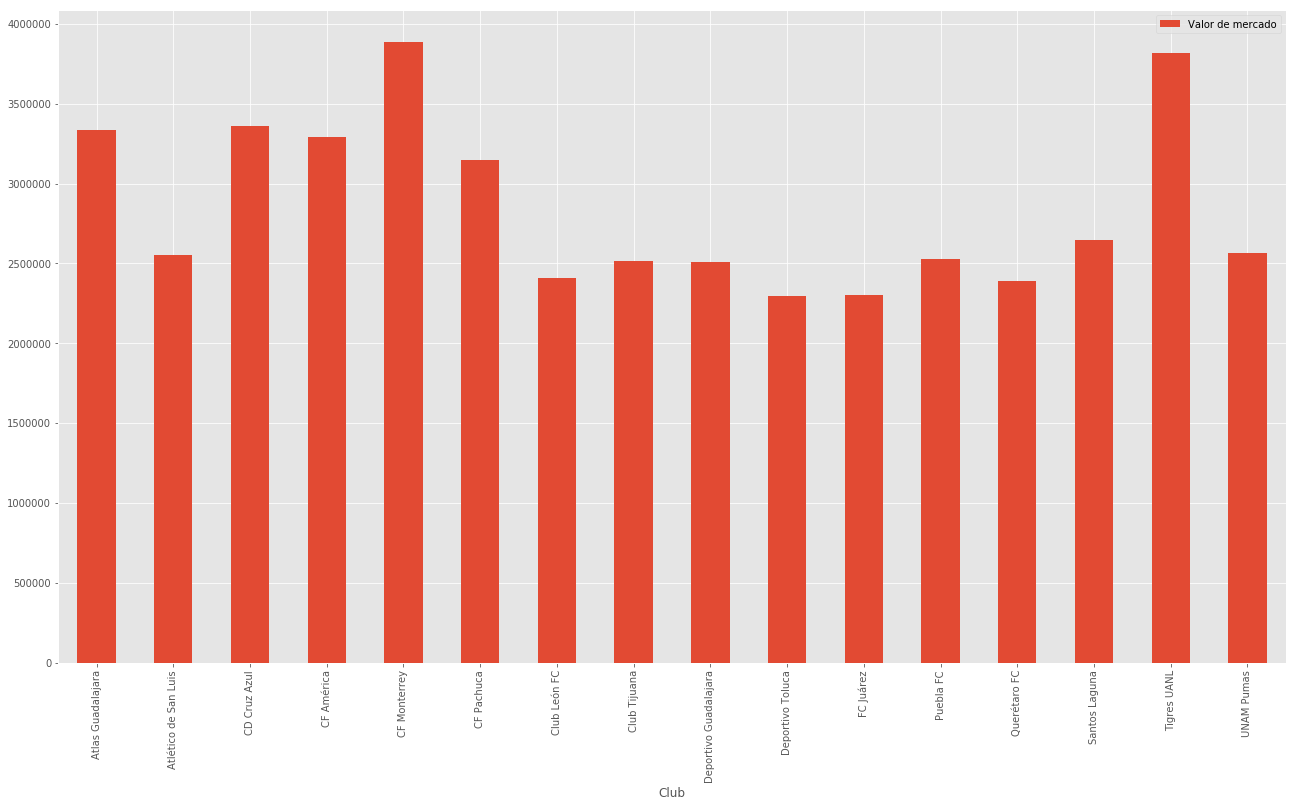

In [170]:
market_value = transfermkt[["Valor de mercado", "Club"]].groupby(["Club"]).agg("mean")
market_value.plot.bar();

In [180]:
equipos = ['CF América','Deportivo Guadalajara']
data_filter = transfermkt[transfermkt.Club.isin(equipos)]
data_filter

,index,#,Name,Posición,Nac.,Edad,Club,Valor más alto de carrera,Última revisión,Valor de mercado,Diferencial valor de Mercado,Posición Simple,Precio,local
3,3,4,Guido Rodríguez,Pivote,Argentina,25,CF América,10000000.0,08/02/2019,10000000.0,1.000000,2,3,0
8,8,9,Mateus Uribe,Mediocentro,Colombia,28,CF América,7500000.0,08/02/2019,7500000.0,1.000000,2,3,0
11,11,12,Nicolás Castillo,Delantero centro,Chile,26,CF América,6000000.0,11/01/2019,6000000.0,1.000000,3,3,0
15,15,16,Roger Martínez,Delantero centro,Colombia,25,CF América,5000000.0,08/02/2019,5000000.0,1.000000,3,3,0
20,20,21,Bruno Valdez,Defensa central,Paraguay,26,CF América,5000000.0,08/02/2019,5000000.0,1.000000,1,3,0
22,22,23,Agustín Marchesín,Portero,Argentina,31,CF América,4500000.0,08/02/2019,4500000.0,1.000000,1,3,0
28,3,4,Guido Rodríguez,Pivote,Argentina,25,CF América,10000000.0,08/02/2019,10000000.0,1.000000,2,3,0
33,8,9,Mateus Uribe,Mediocentro,Colombia,28,CF América,7500000.0,08/02/2019,7500000.0,1.000000,2,3,0
36,11,12,Nicolás Castillo,Delantero centro,Chile,26,CF América,6000000.0,11/01/2019,6000000.0,1.000000,3,3,0
40,15,16,Roger Martínez,Delantero centro,Colombia,25,CF América,5000000.0,08/02/2019,5000000.0,1.000000,3,3,0


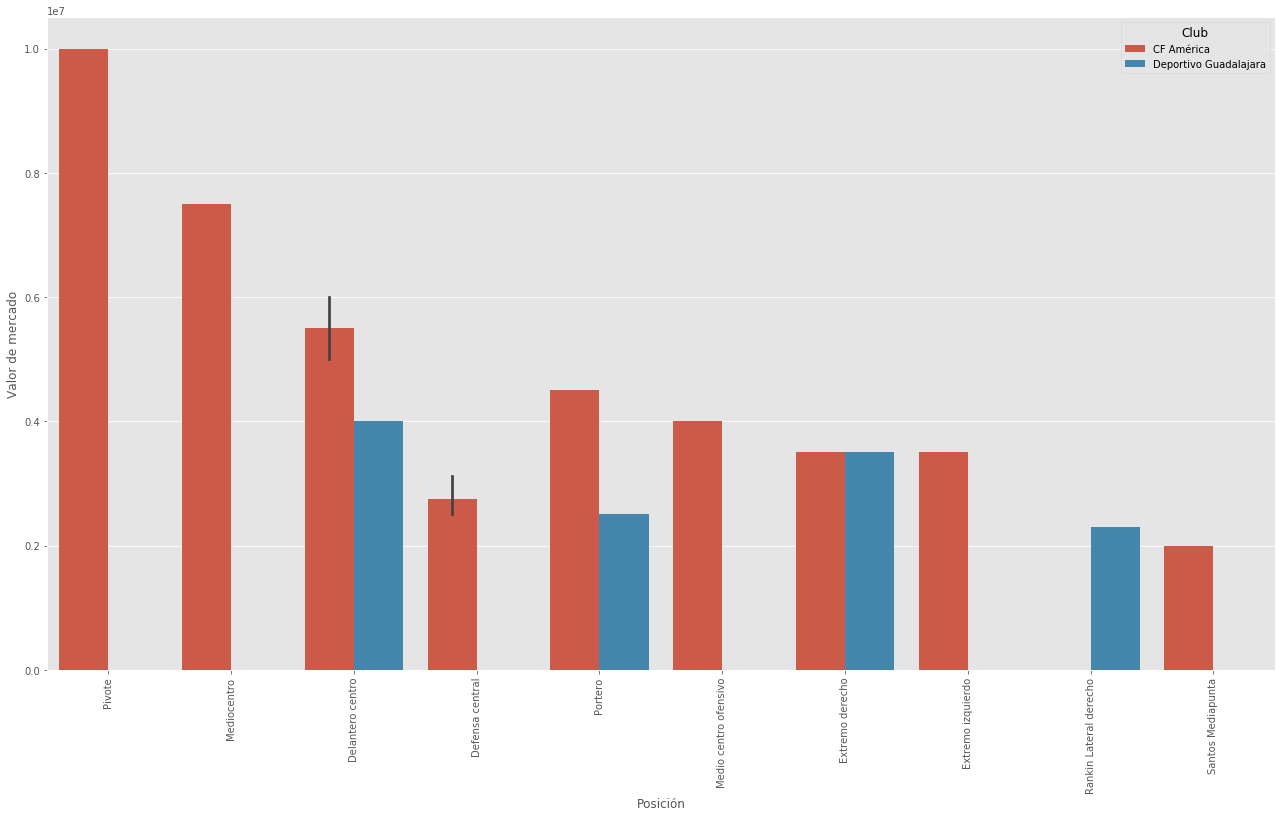

In [181]:
ax = sns.barplot(x="Posición", y="Valor de mercado", hue="Club", data=data_filter)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

Hacer un loop para graficar los scatter plots que compartan eje x en una misma gráfica. 

Hacer un FacetGrid que muestre en subplots la distribución de la edad en relación con su nacionalidad (extranjero o no). 

Asimismo, uno que muestre la distribución de la edad en relación con su posición.

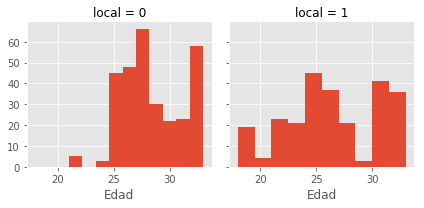

In [167]:
edad = sns.FacetGrid(transfermkt, col="local")
edad.map(plt.hist, 'Edad')

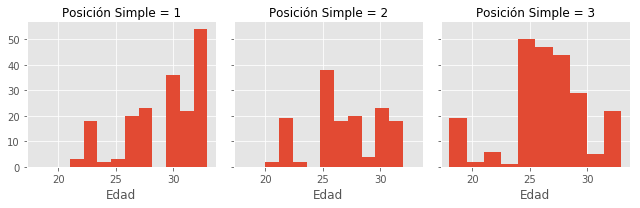

In [168]:
posicion = sns.FacetGrid(transfermkt, col="Posición Simple")
posicion.map(plt.hist, 'Edad')

#### Notas Adicionales

De momento, con estos df no podremos hacer gráficas que funcionen como series de tiempo, pues todos los valores son estáticos.
Una mejora futura es ilustrar el comportamiento de ciertas variables (valor de mercado, xG por temporada, pases por partido) de cierto tipo de jugadores (jugadores destacados o de interés especial) a lo largo del tiempo.

Creación de índices: índice de qué tan desigual es una liga.